In [1]:
# coding: utf-8
import re
import math
import csv
import sys
import os
import struct
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from obspy import UTCDateTime, Stream, Trace

%matplotlib inline

In [2]:
def unpackAfile(infile):

# == opening Afile ==
    b = os.path.getsize(infile)
    FH = open(infile, 'rb')
    line = FH.read(b)
    fileHeader = struct.unpack("<4s3h6bh6s", line[0:24])

    fileLength = fileHeader[3]
    port = fileHeader[10]
    # FirstStn = fileHeader[11][0:4].decode('ASCII').rstrip()
# =================================Header=================================

    portHeader = []
    for i in range(24, port * 32, 32):
        port_data = struct.unpack("<4s4s3sbh2b4s12b", line[i:i+32])
        portHeader.append(port_data)

# =================================Data===================================

    dataStartByte = 24+int(port)*32
    dataPoint = 3*int(port)*int(fileLength)*100
    times = int(port)*3*4
    data = []

    data = struct.unpack("<%di" % dataPoint, line[dataStartByte:dataStartByte + dataPoint*4])


    portHeader = np.array(portHeader)
    data = np.array(data)
    idata = data.reshape((3,port,fileLength*100),order='F')

#== write to obspy Stream --
    sttime = UTCDateTime(fileHeader[1], fileHeader[4], fileHeader[5], fileHeader[6], fileHeader[7], fileHeader[8], fileHeader[2])
    npts = fileHeader[3]*fileHeader[9]
    samp = fileHeader[9]
    afst = Stream()
    
    for stc in range(fileHeader[10]):
        stn = portHeader[stc][0].decode('ASCII').rstrip()
        instrument = portHeader[stc][1].decode('ASCII').rstrip()
        loc = '0'+str(portHeader[stc][6].decode('ASCII'))
        net = str(portHeader[stc][7].decode('ASCII')).rstrip()
        GPS = int(portHeader[stc][3])
        
        # remove GPS unlock or broken station
        if ( 2>1):
            chc = 0
            if instrument == 'FBA':
                chc = 1
            elif instrument == 'SP':
                chc = 4
            elif instrument == 'BB':
                chc = 7
            
            for ch in range(3):
                chn = 'Ch'+str(chc+ch)
                
                stats = {'network': net, 'station': stn, 'location': loc,
                        'channel': chn, 'npts': npts, 'sampling_rate': samp,
                        'starttime': sttime}
                
                data = np.array(idata[ch][stc], dtype=float)
                sttmp = Stream([Trace(data=data, header=stats)])
                afst += sttmp

    return afst

In [3]:
st=unpackAfile("02080054.18C")

FileNotFoundError: [WinError 2] 系統找不到指定的檔案。: '02080054.18C'

In [ ]:
aa=st.select(network="SMT",channel="Ch1")
st.select(network="SMT",channel="Ch1")

In [4]:
sta = [ i.stats.station for i in aa ]
[ i.stats.station for i in aa ]

NameError: name 'aa' is not defined

In [10]:
# SMT.NNS.01.Ch1
# SMT.NSK.01.Ch1
# SMT.SML.01.Ch1
# SMT.TWC.01.Ch1
# SMT.WPL.01.Ch1
st.select(station="NNS",channel="Ch1")
#for i in aa:
#    i.plot()

1 Trace(s) in Stream:
SMT.NNS.01.Ch1 | 2018-02-08T00:54:00.000000Z - 2018-02-08T00:54:59.990000Z | 100.0 Hz, 6000 samples

In [12]:
with open(r"D:\python\0602\PhaseNet-master\demo\fname.csv", 'w') as fp:
    fp.write("fname\n")
    for ii in sta: 
        for i in range(2):
            dd1=st.select(station=ii,channel="Ch1")[0].data[3000*i:3000*(i+1)]*1.0
            dd2=st.select(station=ii,channel="Ch2")[0].data[3000*i:3000*(i+1)]*1.0
            dd3=st.select(station=ii,channel="Ch3")[0].data[3000*i:3000*(i+1)]*1.0
            dd=np.vstack((dd1,dd2,dd3)).T
    
            ffname = f"D:\\python\\0602\\PhaseNet-master\\demo\\{ii}-{i}.npz"
            np.savez(ffname, data=dd)
            print(ffname)
            ffname = f"{ii}-{i}.npz\n"
            fp.write(ffname)

D:\python\0602\PhaseNet-master\demo\ALS-0.npz
D:\python\0602\PhaseNet-master\demo\ALS-1.npz
D:\python\0602\PhaseNet-master\demo\ANP-0.npz
D:\python\0602\PhaseNet-master\demo\ANP-1.npz
D:\python\0602\PhaseNet-master\demo\BAC-0.npz
D:\python\0602\PhaseNet-master\demo\BAC-1.npz
D:\python\0602\PhaseNet-master\demo\CHK-0.npz
D:\python\0602\PhaseNet-master\demo\CHK-1.npz
D:\python\0602\PhaseNet-master\demo\CHN1-0.npz
D:\python\0602\PhaseNet-master\demo\CHN1-1.npz
D:\python\0602\PhaseNet-master\demo\CHN2-0.npz
D:\python\0602\PhaseNet-master\demo\CHN2-1.npz
D:\python\0602\PhaseNet-master\demo\CHN3-0.npz
D:\python\0602\PhaseNet-master\demo\CHN3-1.npz
D:\python\0602\PhaseNet-master\demo\CHN4-0.npz
D:\python\0602\PhaseNet-master\demo\CHN4-1.npz
D:\python\0602\PhaseNet-master\demo\CHN5-0.npz
D:\python\0602\PhaseNet-master\demo\CHN5-1.npz
D:\python\0602\PhaseNet-master\demo\CHN8-0.npz
D:\python\0602\PhaseNet-master\demo\CHN8-1.npz
D:\python\0602\PhaseNet-master\demo\EAS-0.npz
D:\python\0602\PhaseNe

D:\python\0602\PhaseNet-master\demo\WSS-1.npz
D:\python\0602\PhaseNet-master\demo\WTC-0.npz
D:\python\0602\PhaseNet-master\demo\WTC-1.npz
D:\python\0602\PhaseNet-master\demo\WTP-0.npz
D:\python\0602\PhaseNet-master\demo\WTP-1.npz
D:\python\0602\PhaseNet-master\demo\WWF-0.npz
D:\python\0602\PhaseNet-master\demo\WWF-1.npz
D:\python\0602\PhaseNet-master\demo\WYL-0.npz
D:\python\0602\PhaseNet-master\demo\WYL-1.npz
D:\python\0602\PhaseNet-master\demo\YUS-0.npz
D:\python\0602\PhaseNet-master\demo\YUS-1.npz


In [13]:
with open(r"D:\python\0602\PhaseNet-master\output\picks.csv") as fp:
    data=fp.readlines()

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\python\\0602\\PhaseNet-master\\output\\picks.csv'

In [75]:
dd=[i.strip() for i in data]
[i.strip() for i in data][2].split(",")[2].strip("[]").strip()


'0.4340671'

In [71]:
dd

['fname,itp,tp_prob,its,ts_prob',
 'BAC-0.npz,[],[],[],[]',
 'ALS-0.npz,[1504],[ 0.4340671],[2525],[ 0.37128958]',
 'CHK-0.npz,[],[],[],[]',
 'CHK-1.npz,[468],[ 0.78651094],[1945],[ 0.6250978]',
 'BAC-1.npz,[],[],[1002],[ 0.7013177]',
 'ANP-1.npz,[1161],[ 0.39753363],[],[]',
 'ANP-0.npz,[],[],[],[]',
 'ALS-1.npz,[432],[ 0.77231026],[],[]',
 'CHN1-0.npz,[],[],[],[]',
 'CHN3-0.npz,[],[],[951],[ 0.3771739]',
 'CHN1-1.npz,[1227],[ 0.6876911],[],[]',
 'CHN3-1.npz,[2443],[ 0.3114063],[],[]',
 'CHN4-1.npz,[945],[ 0.5918953],[],[]',
 'CHN4-0.npz,[],[],[],[]',
 'CHN2-0.npz,[],[],[],[]',
 'CHN2-1.npz,[1033],[ 0.50971746],[],[]',
 'ECB-1.npz,[],[],[],[]',
 'EAS-1.npz,[313],[ 0.35848454],[363],[ 0.4449745]',
 'CHN8-0.npz,[],[],[],[]',
 'CHN8-1.npz,[1537],[ 0.7283097],[],[]',
 'ECB-0.npz,[],[],[],[]',
 'CHN5-1.npz,[612],[ 0.68368405],[],[]',
 'EAS-0.npz,[],[],[],[]',
 'CHN5-0.npz,[],[],[],[]',
 'EGS-1.npz,[],[],[],[]',
 'ECS-0.npz,[],[],[],[]',
 'EGS-0.npz,[],[],[],[]',
 'ECL-1.npz,[1465],[ 0.50357

In [15]:
def unpackPfile(infile):
    
    with open(infile) as f:
        lines = f.readlines()
    
    tmp = lines[0]
    year = int(tmp[1:5])
    month = int(tmp[5:7])
    day = int(tmp[7:9])
    hour = int(tmp[9:11])
    minute = int(tmp[11:13])
    sec = float(tmp[13:19])

    dt = datetime(year,month,day,hour,minute,int(sec//1),int(sec%1 * 1000000))
    mag = float(tmp[40:44])

    pfile_info = {}
    pfile_info["ori_time"] = dt
    pfile_info["mag"] = mag

    intensity = {}
    arrival_time = {}
    weighting = {}
    pga = {}
    for i in lines[1:]:
        sta = i[:5].strip() # strip 去掉左右空格
        weighting[sta] = int(float(i[35:39]))
        intensity[sta] = int(i[76:77])
        pga[sta] = float(i[78:83])
        arrival_time[sta] = pfile_info["ori_time"].replace(minute=int(i[21:23]),second=0,microsecond=0) + timedelta(seconds=float(i[23:29]))
    pfile_info["intensity"] = intensity
    pfile_info["arrival_time"] = arrival_time
    pfile_info["weighting"] = weighting
    pfile_info["pga"] = pga
    
    return pfile_info

In [16]:
st=unpackAfile("13010000.A17")

In [18]:
st.select(station="SSD")

6 Trace(s) in Stream:
SMT.SSD.01.Ch4 | 2017-01-01T00:00:00.000000Z - 2017-01-01T00:02:39.990000Z | 100.0 Hz, 16000 samples
SMT.SSD.01.Ch5 | 2017-01-01T00:00:00.000000Z - 2017-01-01T00:02:39.990000Z | 100.0 Hz, 16000 samples
SMT.SSD.01.Ch6 | 2017-01-01T00:00:00.000000Z - 2017-01-01T00:02:39.990000Z | 100.0 Hz, 16000 samples
SMT.SSD.01.Ch1 | 2017-01-01T00:00:00.000000Z - 2017-01-01T00:02:39.990000Z | 100.0 Hz, 16000 samples
SMT.SSD.01.Ch2 | 2017-01-01T00:00:00.000000Z - 2017-01-01T00:02:39.990000Z | 100.0 Hz, 16000 samples
SMT.SSD.01.Ch3 | 2017-01-01T00:00:00.000000Z - 2017-01-01T00:02:39.990000Z | 100.0 Hz, 16000 samples

23301204.A16
['TTN', 'EDH', 'LONT', 'TWG', 'TWGB', 'LDU', 'ECS', 'CHK', 'EHD', 'FULB', 'ECL', 'ELD', 'ECB', 'EYUL', 'TWF1', 'YULB', 'STYH', 'STY', 'TAW', 'SSD', 'EAS', 'SMG', 'SLG', 'TAWH', 'MASB', 'EHY', 'SGS', 'HGSD', 'YUS', 'SCS', 'SGL', 'WTP', 'SPT', 'SCZ', 'SLIU', 'TPUB', 'CHN1', 'TWM1', 'ALS', 'CHN4', 'SNS', 'TWL', 'LAY', 'EGFH', 'WCKO', 'SNJ', 'CHN3', 'SHH', 'LYUB', 'SMS', 'EGC', 'KAU', 'VWDT', 'WHY', 'WSS', 'SSH', 'HEN', 'WLC', 'TAI1', 'TWKB', 'TWK1', 'ESL', 'SSLB', 'SEB', 'CHN2', 'CHY', 'SCL', 'ICHU', 'WGK', 'WDLH', 'CHN8', 'SML', 'WJS', 'EYL', 'TYC', 'SCK', 'ETM', 'WUSB', 'WNT', 'WTK', 'WSL', 'HWA', 'WNT1', 'WPL', 'CHGB', 'DPDB', 'WSF', 'WCS', 'TWD', 'WYL', 'WHF', 'WWF', 'WRL', 'ETL', 'WML', 'WTC', 'NACB', 'ETLH', 'WCHH', 'FUSS', 'TCU', 'TDCB', 'WHP', 'WDG', 'TWQ1', 'NNSB', 'NNSH', 'NNS', 'WDJ', 'NSY', 'ENA', 'EWT', 'PHUB', 'LATB', 'PNG', 'VCHM', 'NMLH', 'NFF', 'NST', 'ENT', 'LIOB', 'YHNB', 'NSK', 'NDS', 'TWC', 'TWE', 'FUSB', 'NWL', 'HSN1', 'SBCB', 'ILA', 'HSN', 'EGS', 'NCU',

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Running ENA
Running ENT
Running ESL
Running ETL
Running ETLH
Running ETM
Running EWT
Running EYL
Running EYUL
Running FULB
Running FUSS
Running HEN
Running HSN
Running HSN1
Running HWA
Running ICHU
Running ILA
Running KAU
Running KNM
Running LAY
Running LDU
Running LIOB
Running LONT
Running MSU
Running NCU
Running NCUH
Running NDS
Running NFF
Running NHDH
Running NMLH
Running NNS
Running NNSH
Running NOU
Running NSK
Running NST
Running NSY
Running NWF
Running NWL
Running PNG
Running SCL
Running SCK
Running SCS
Running SCZ
Running SEB
Running SGL
Running SGS
Running SHH
Running SLIU
Running SMG
Running SML
Running SMS
Running SNJ
Running SPT
Running SSH
Running STY
Running STYH
Running TAI1
Running TAW
Running TAWH
Running TCU
Running TIPB
Running TTN
Running TWA
Running TWB1
Running TWC
Running TWD
Running TWE
Running TWF1
Running TWG
Running TWK1
Running TWL
Running TWM1
Running TWQ1
Running TWS1
Running WCKO
Running WCS
Running WDG
Running WDJ
Running WDLH
Running WGK
Running WHF
Run

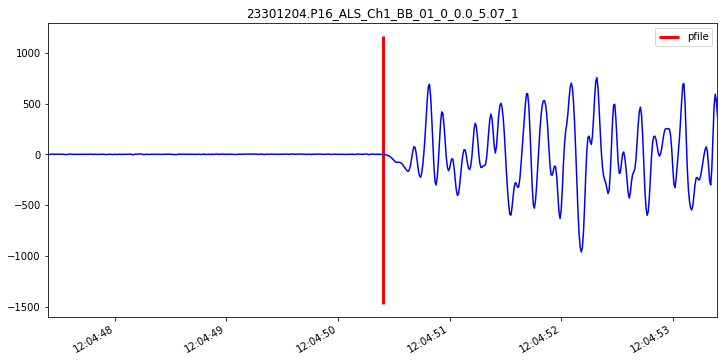

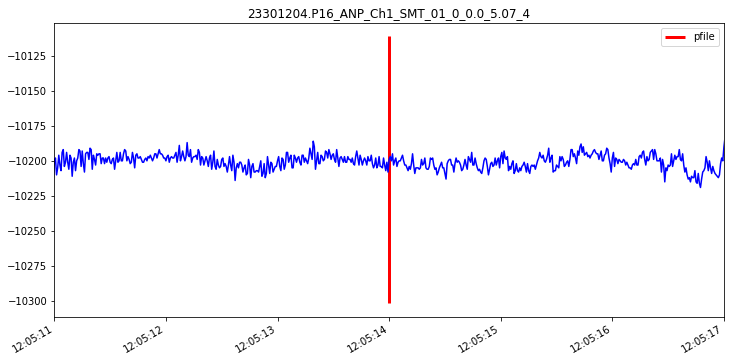

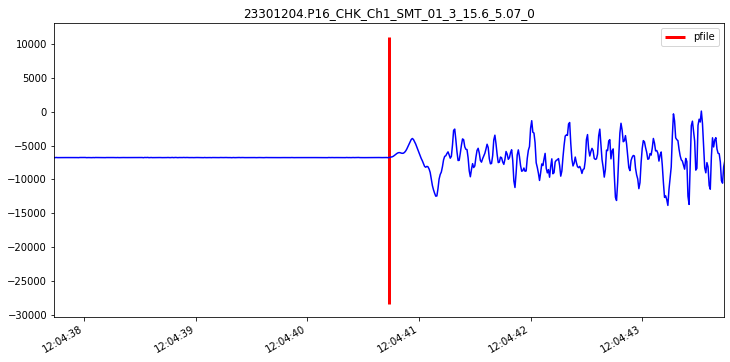

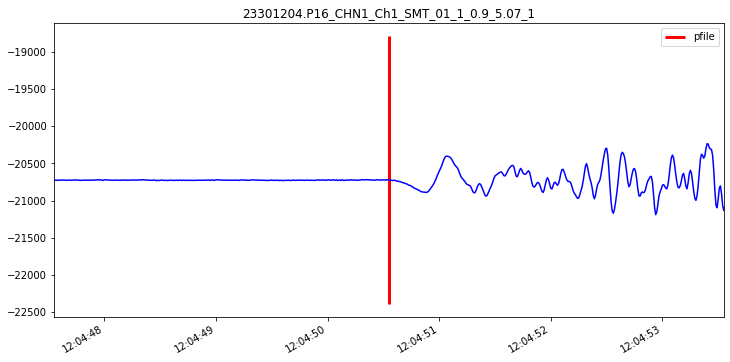

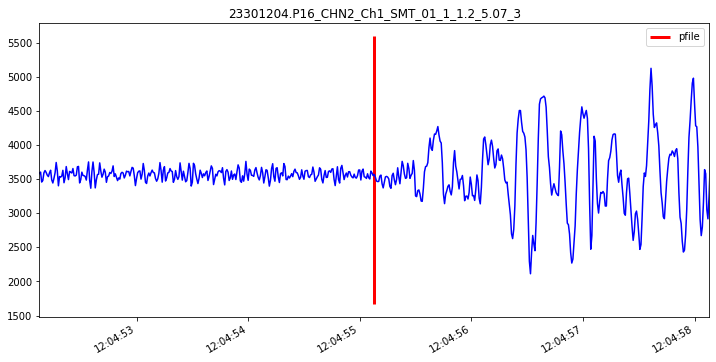

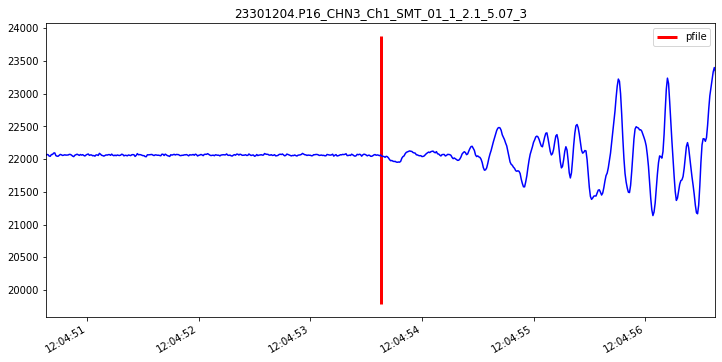

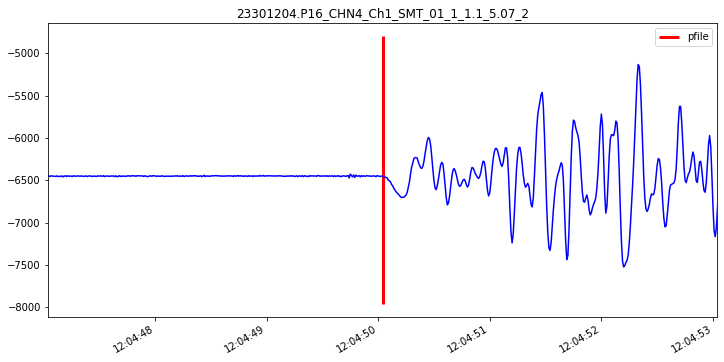

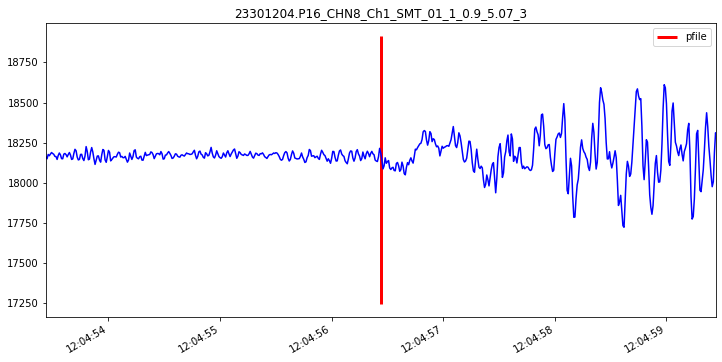

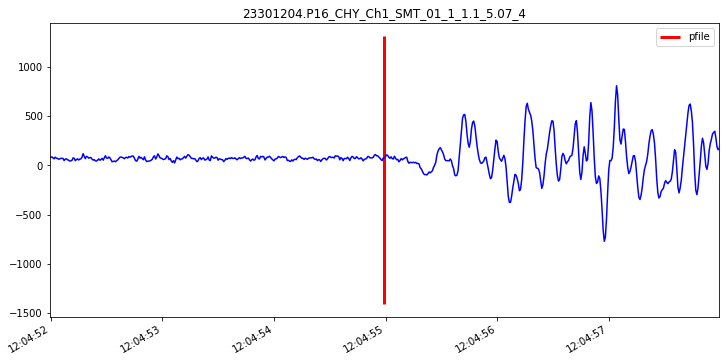

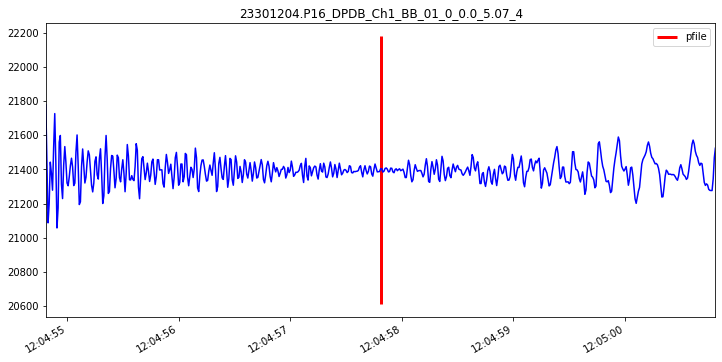

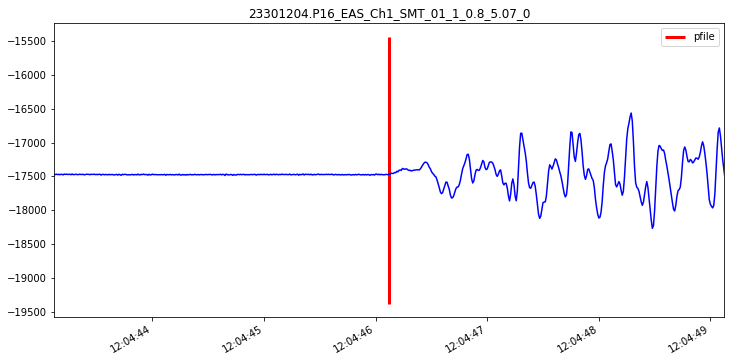

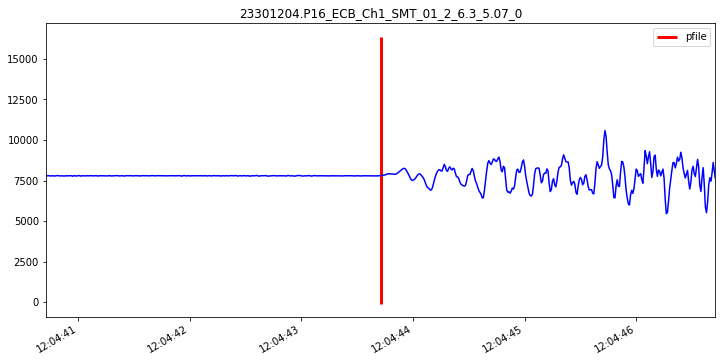

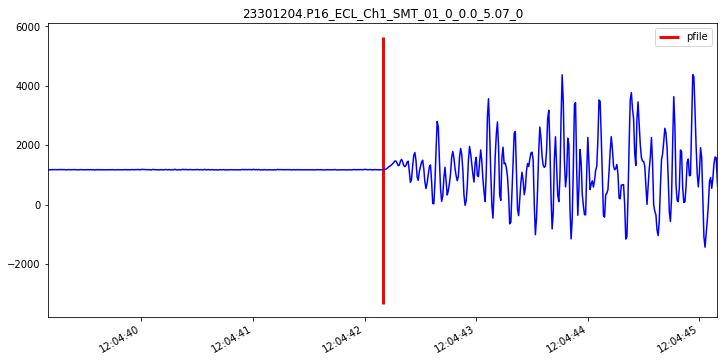

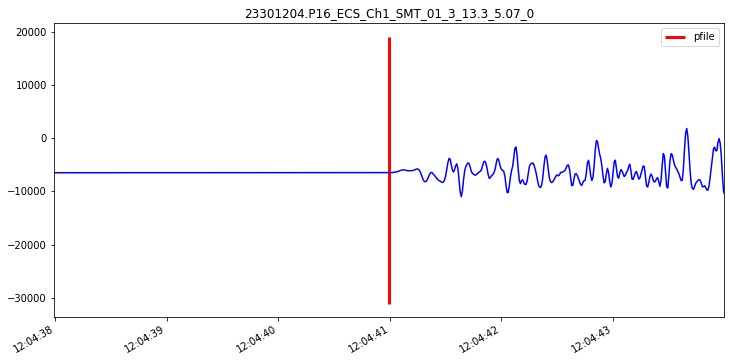

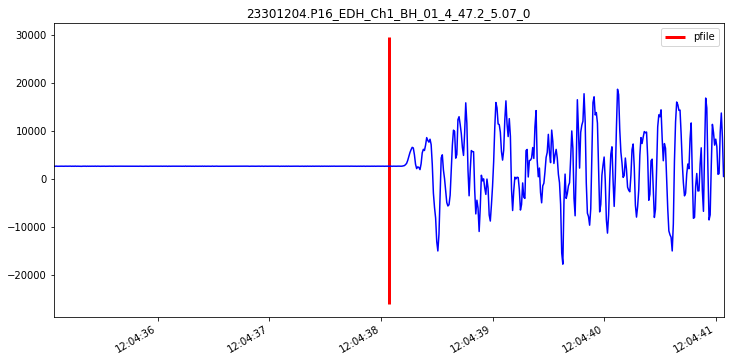

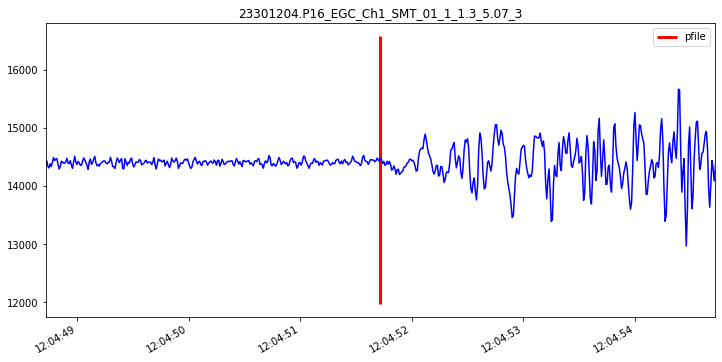

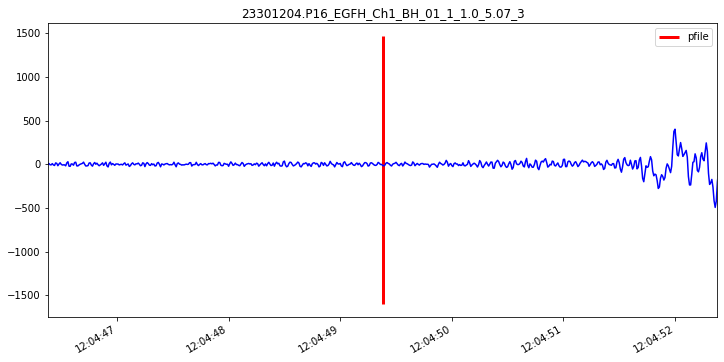

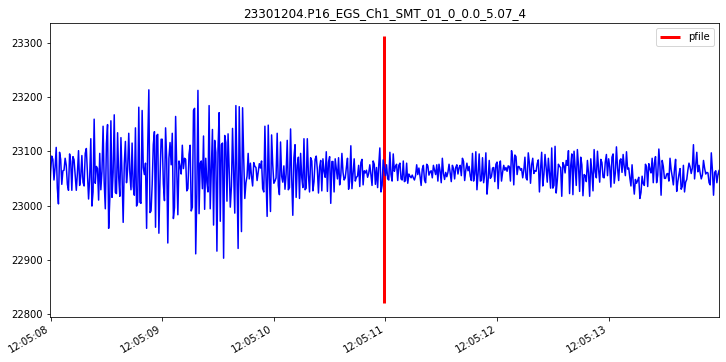

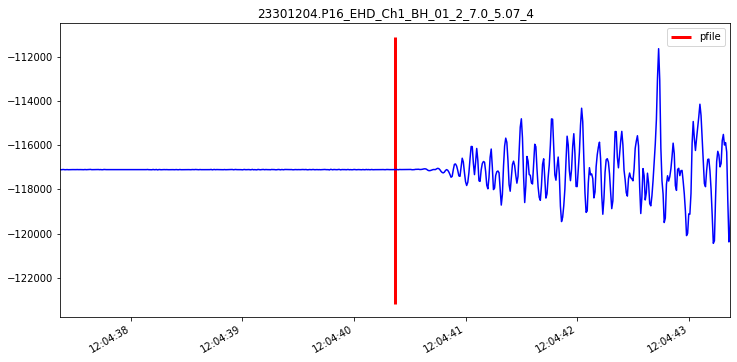

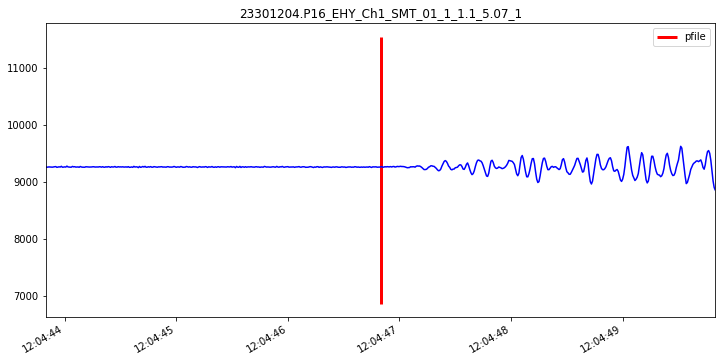

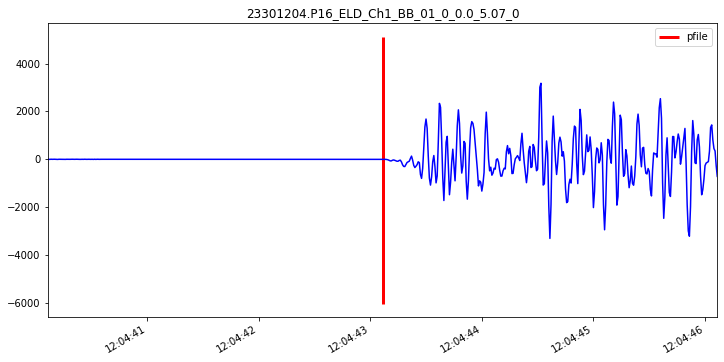

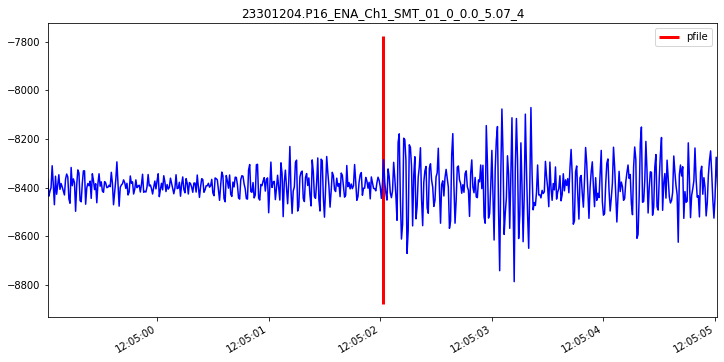

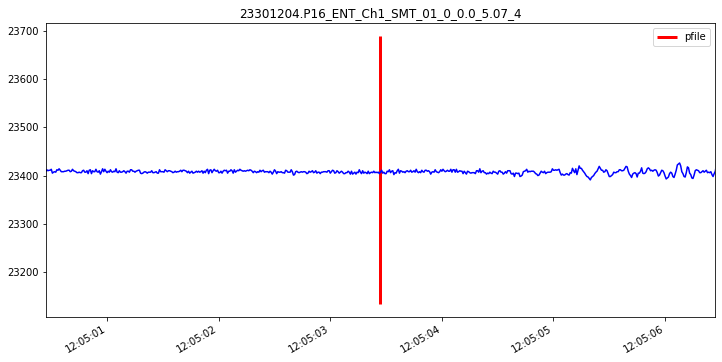

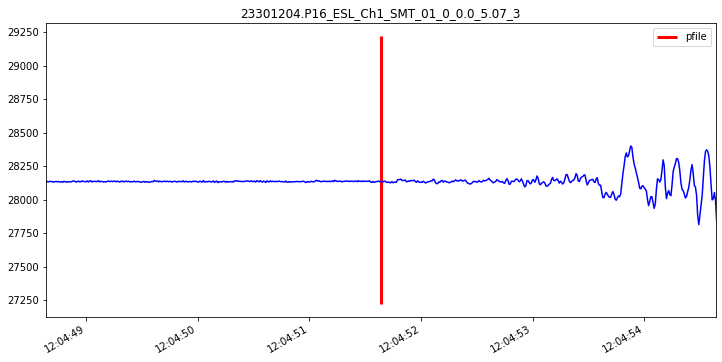

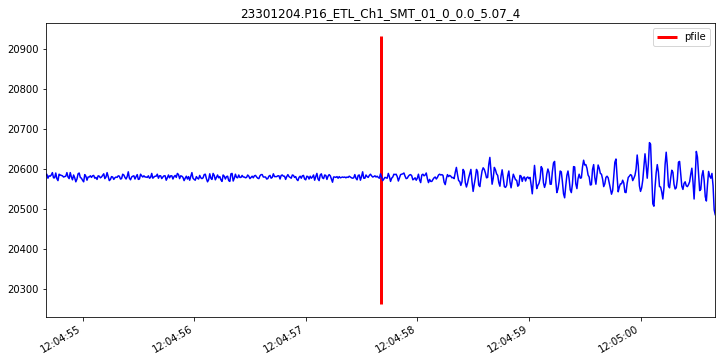

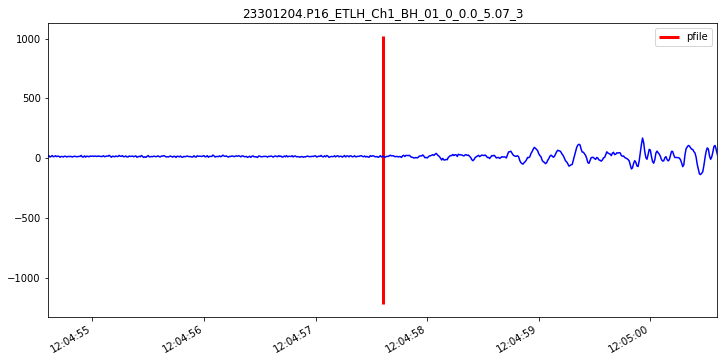

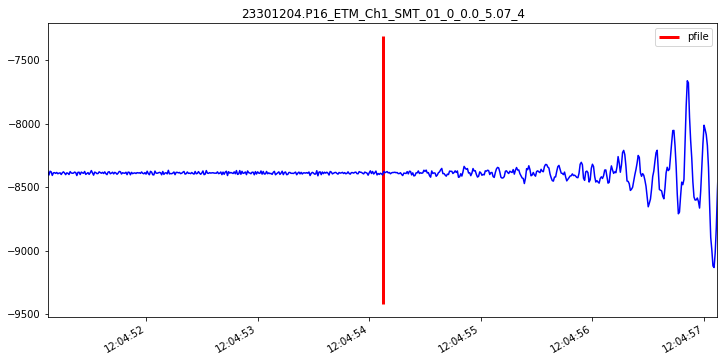

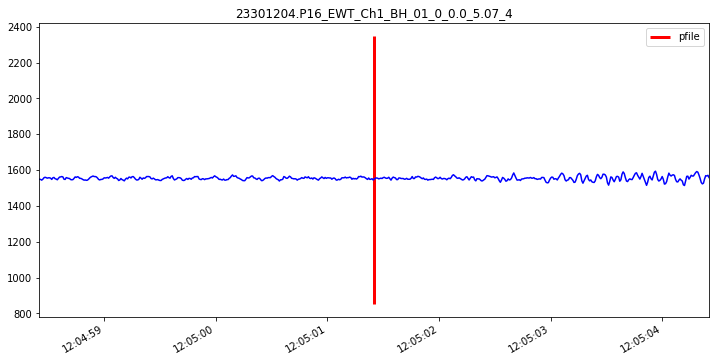

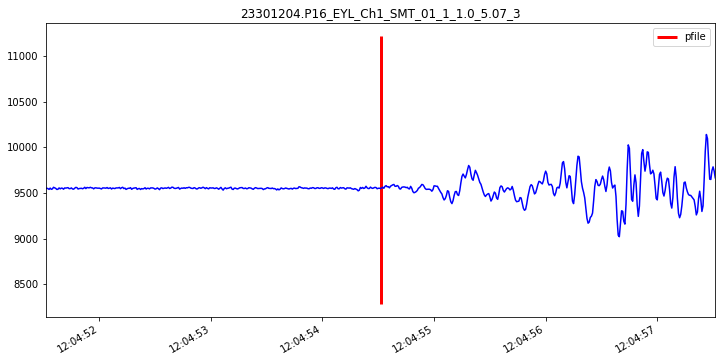

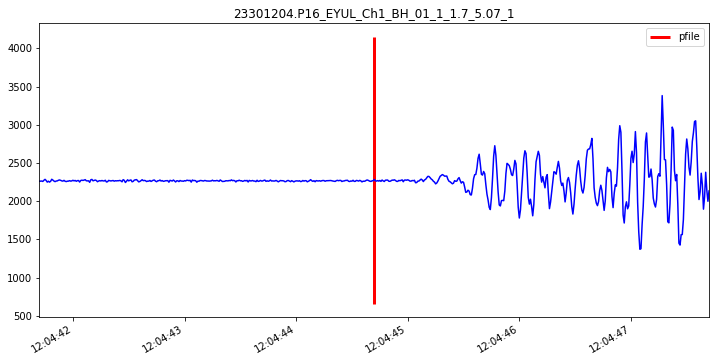

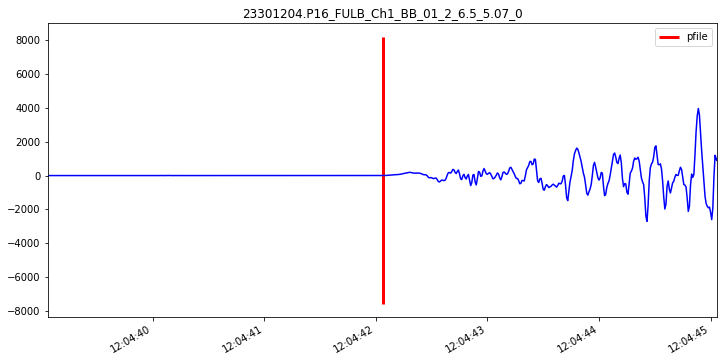

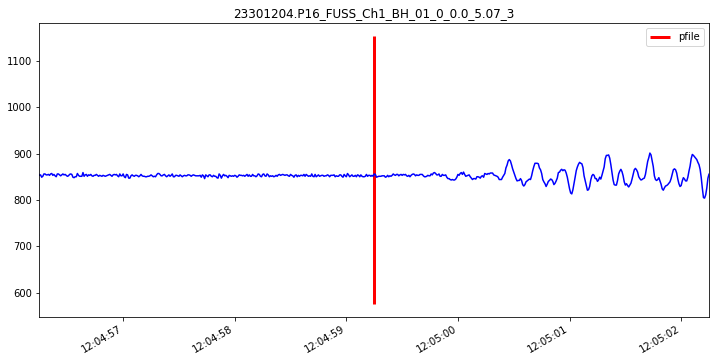

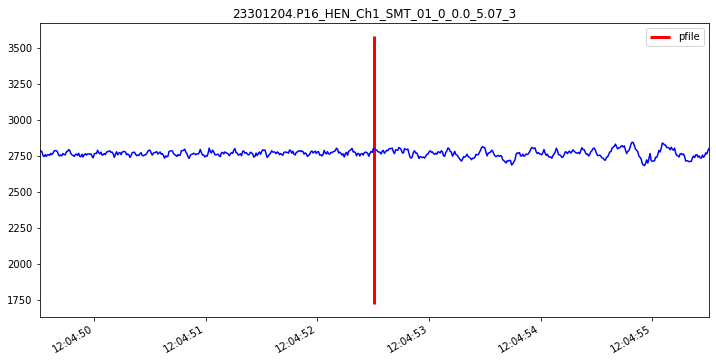

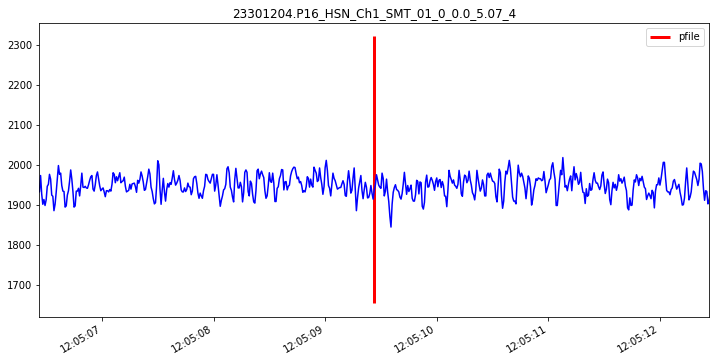

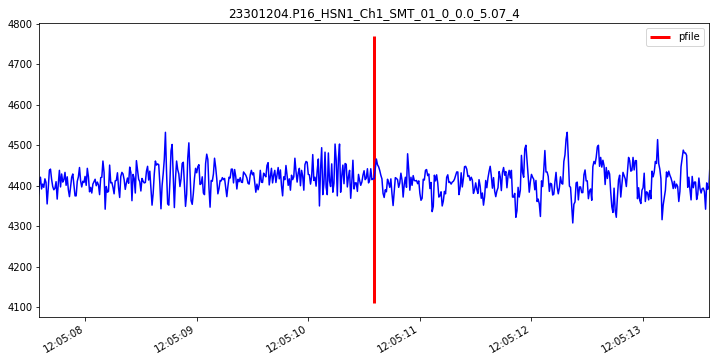

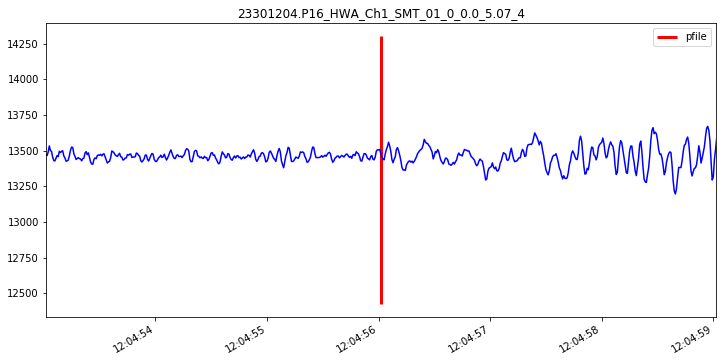

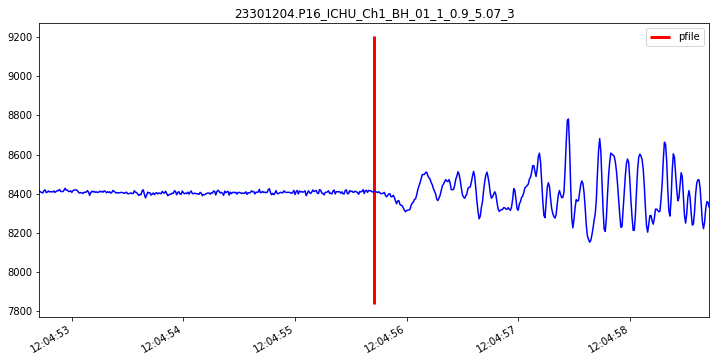

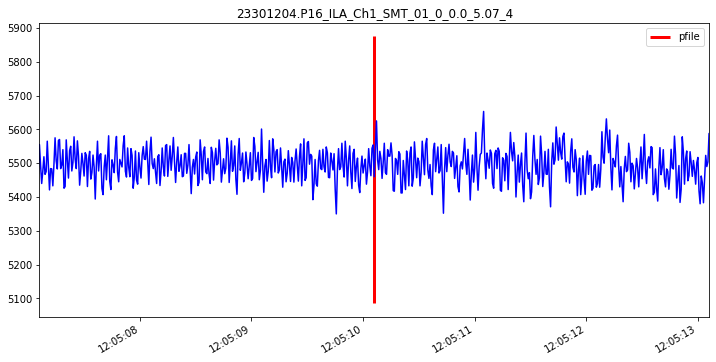

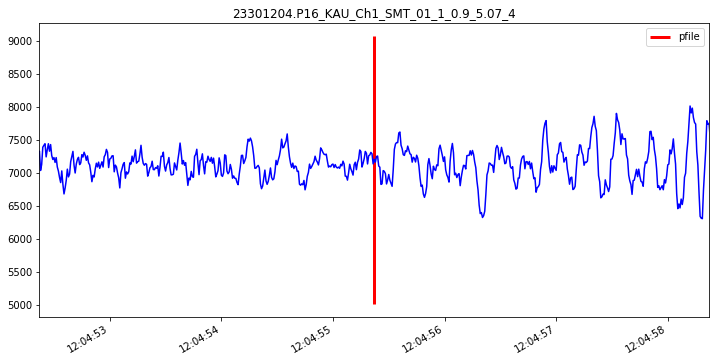

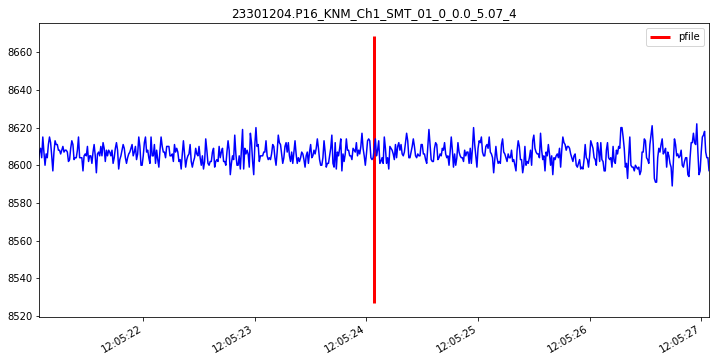

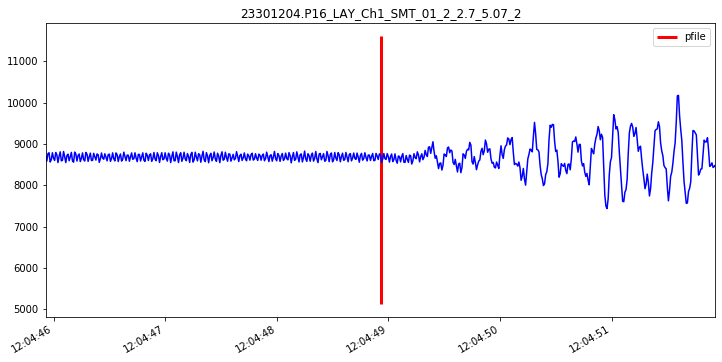

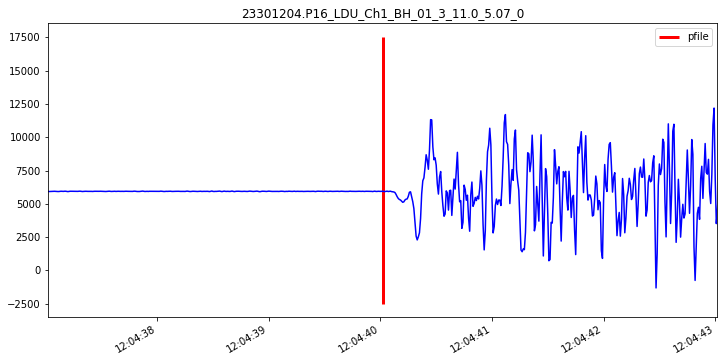

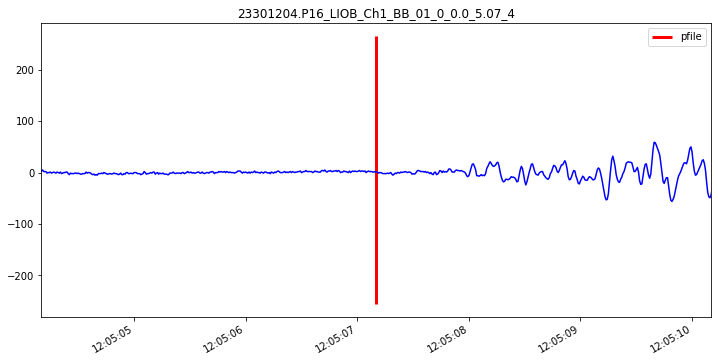

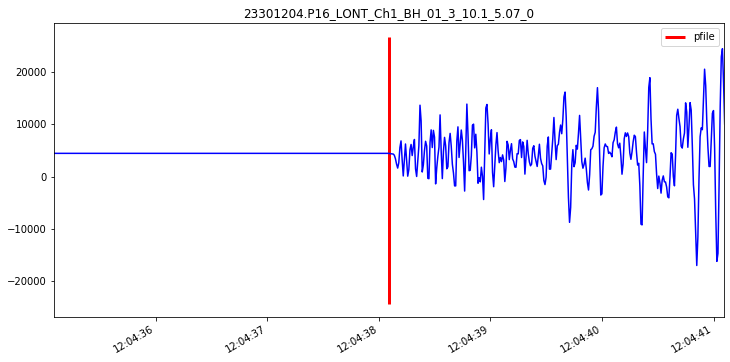

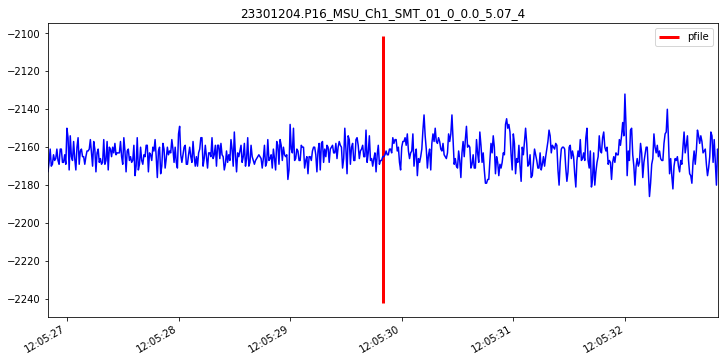

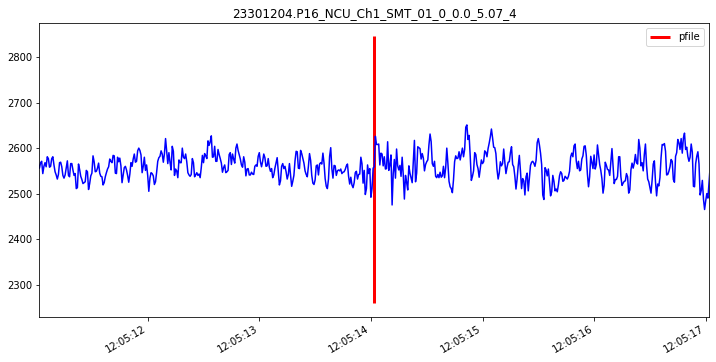

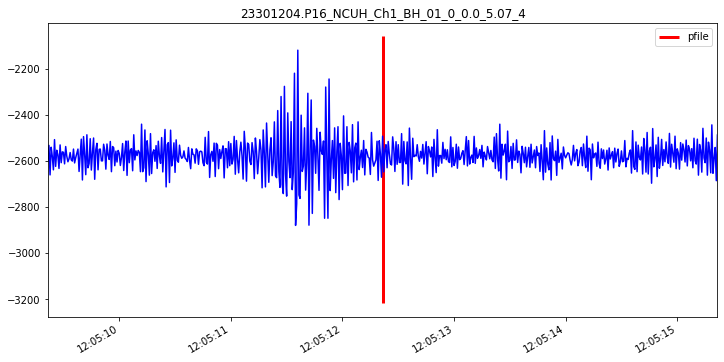

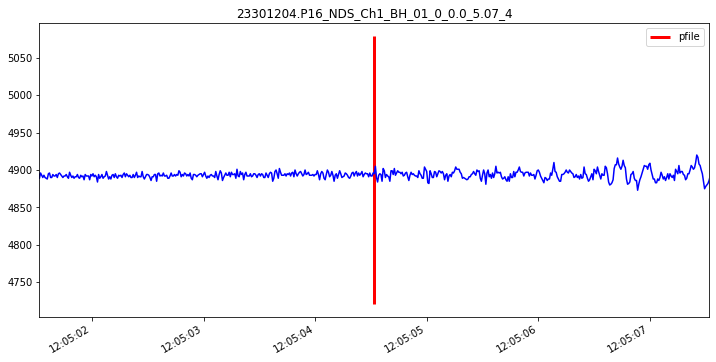

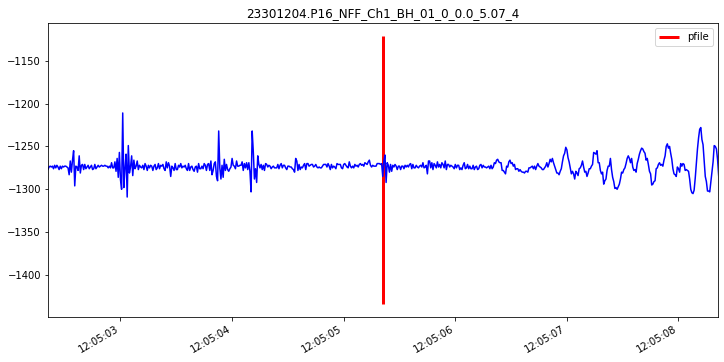

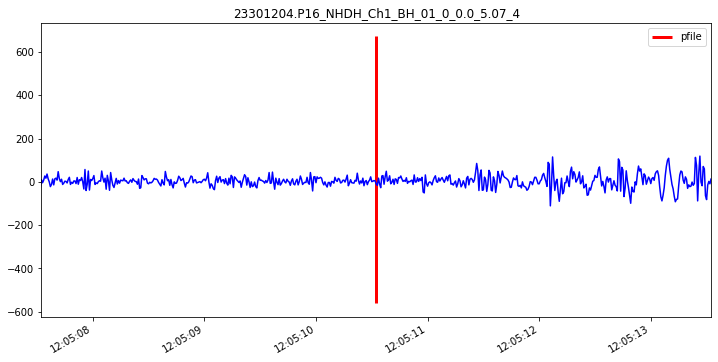

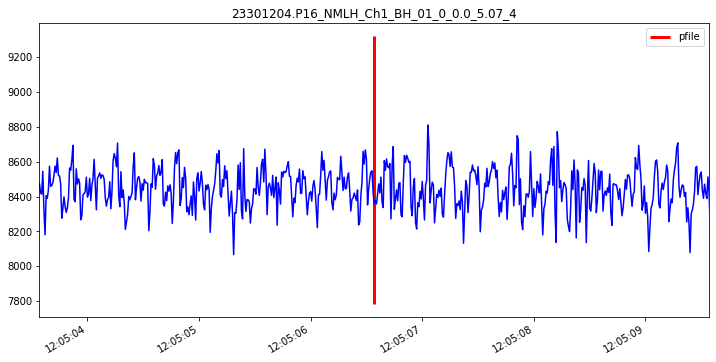

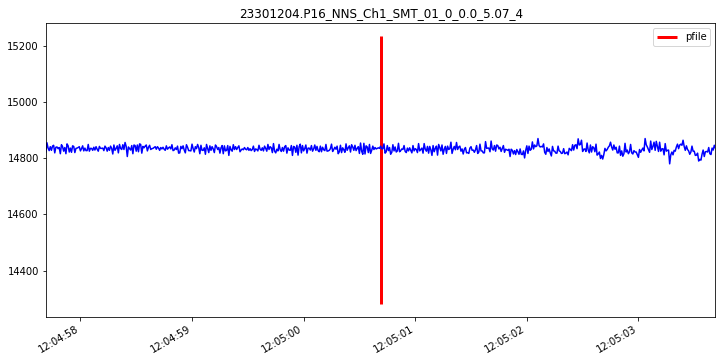

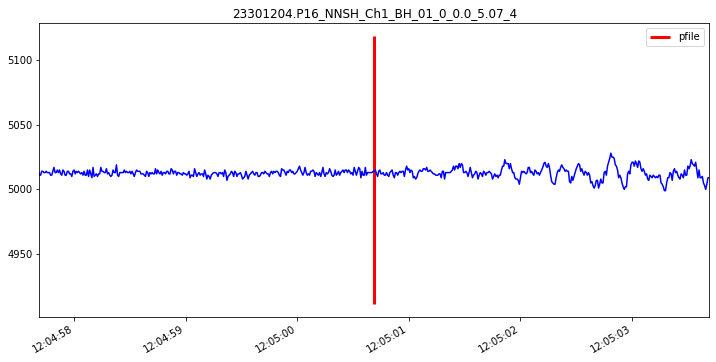

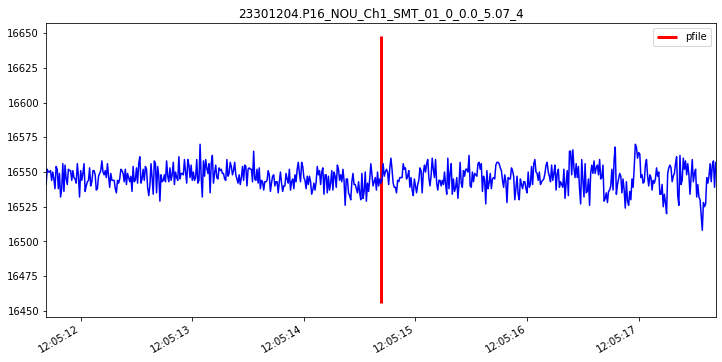

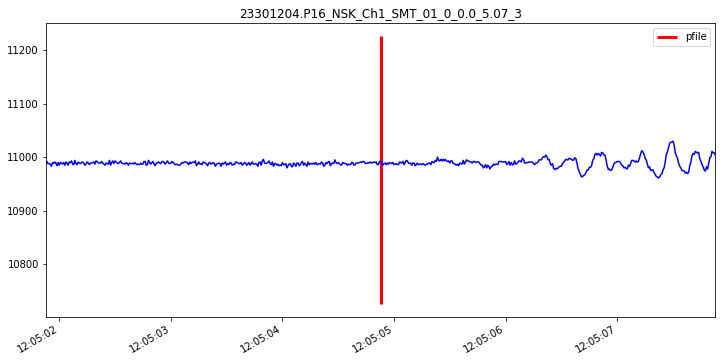

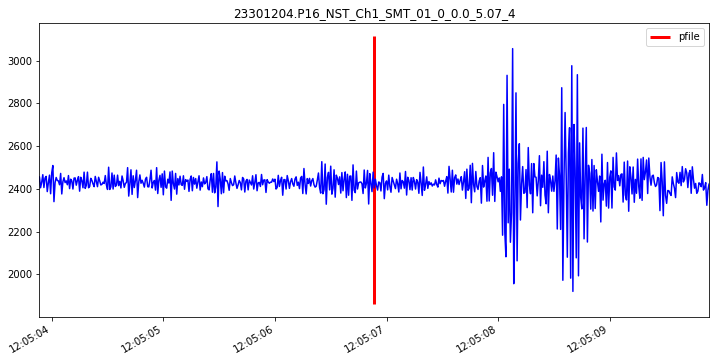

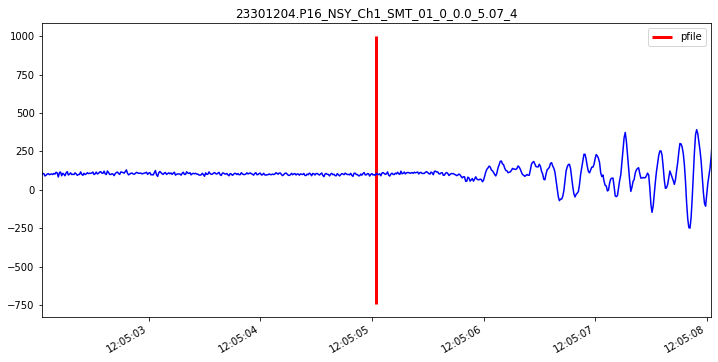

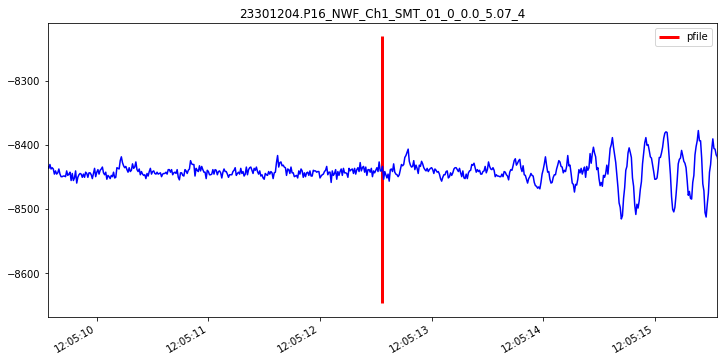

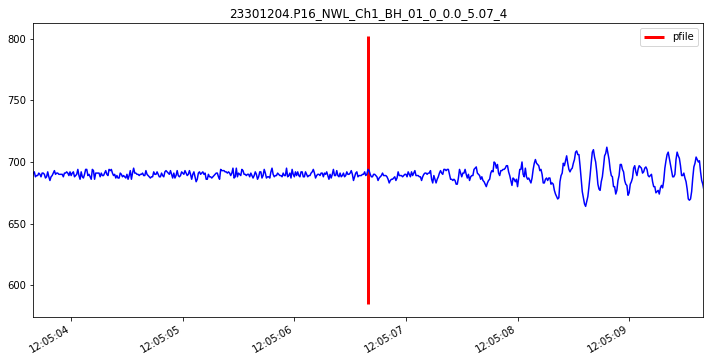

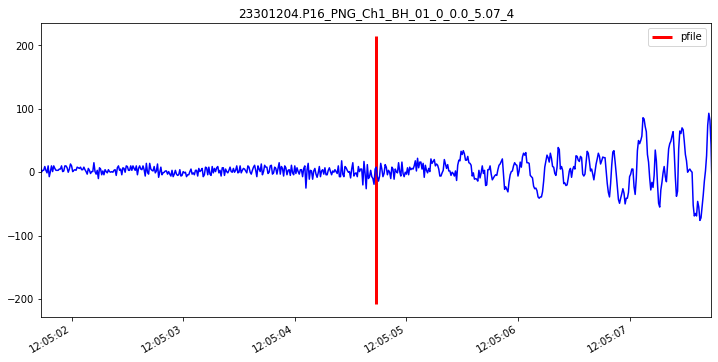

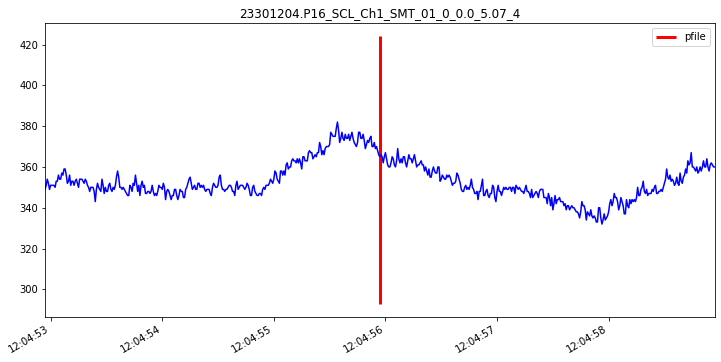

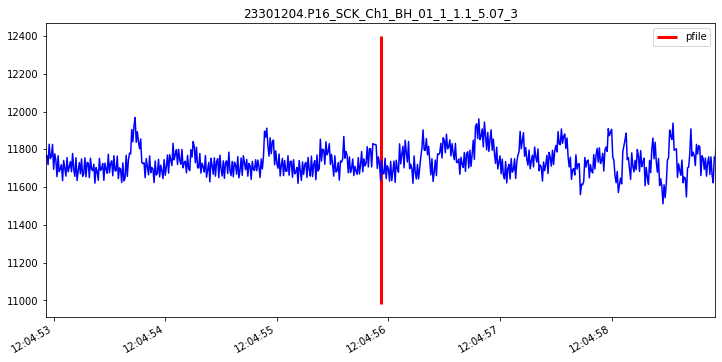

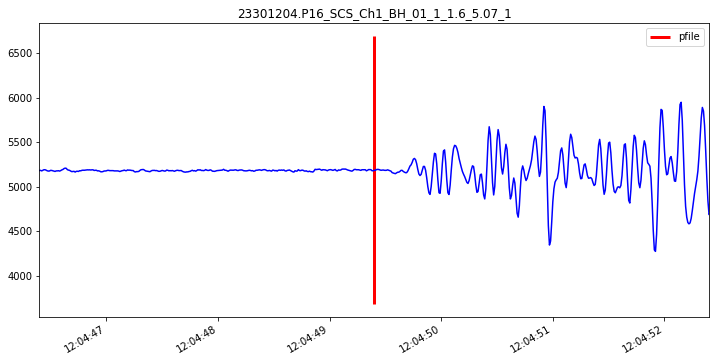

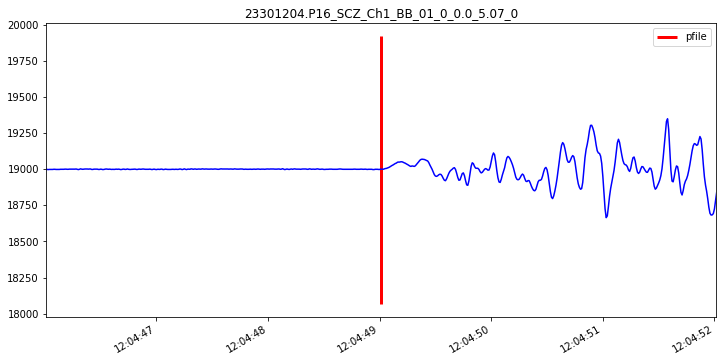

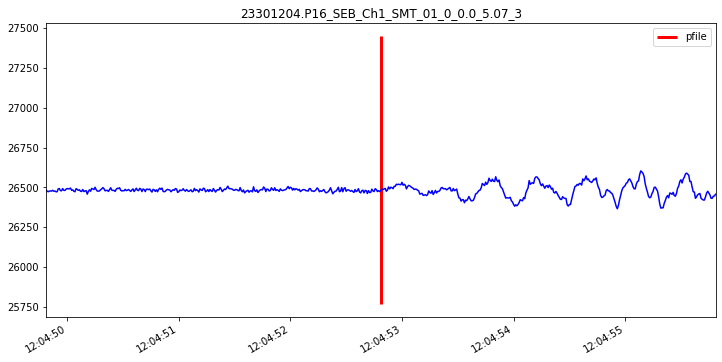

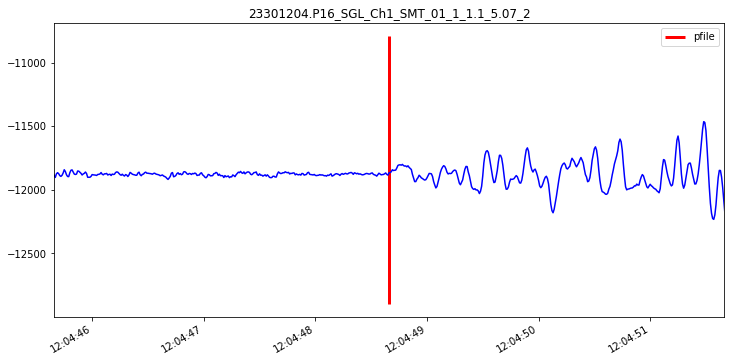

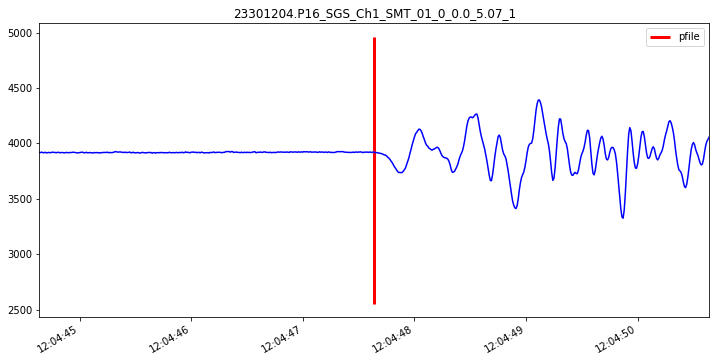

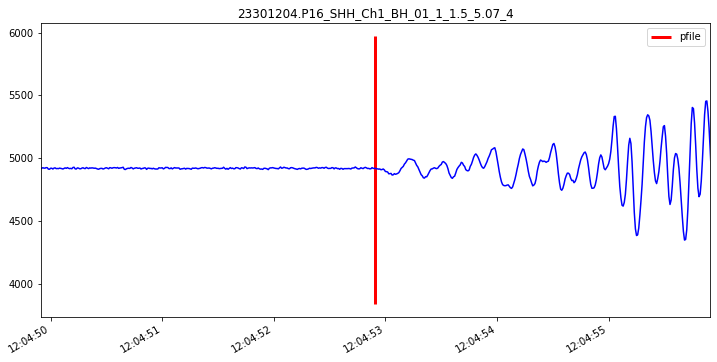

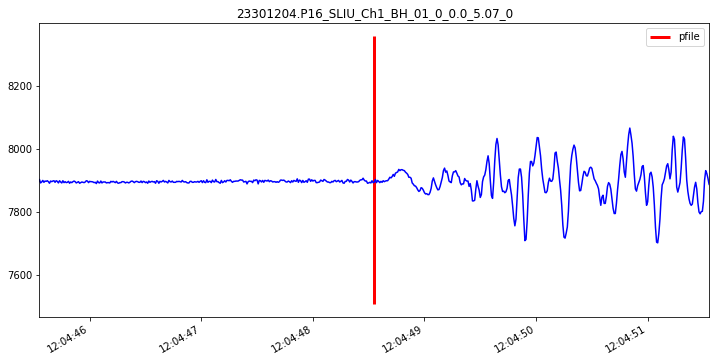

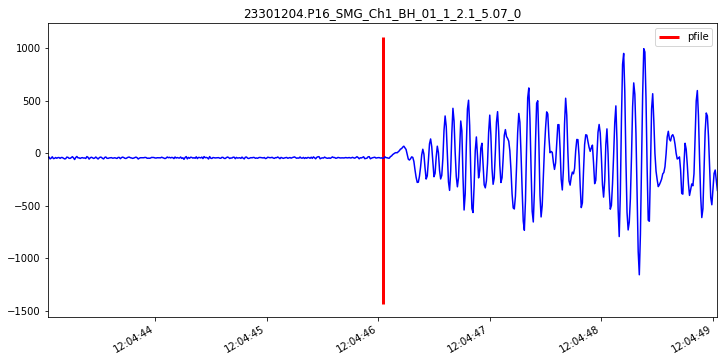

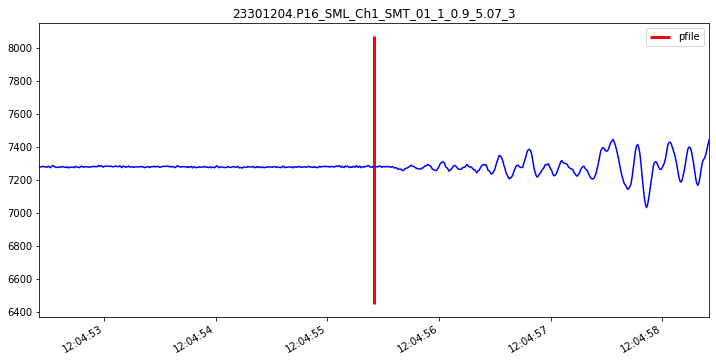

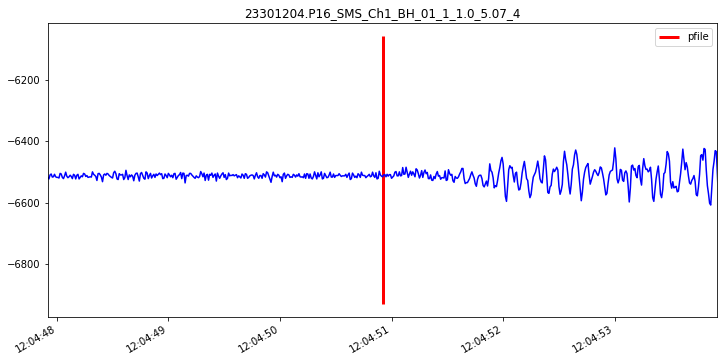

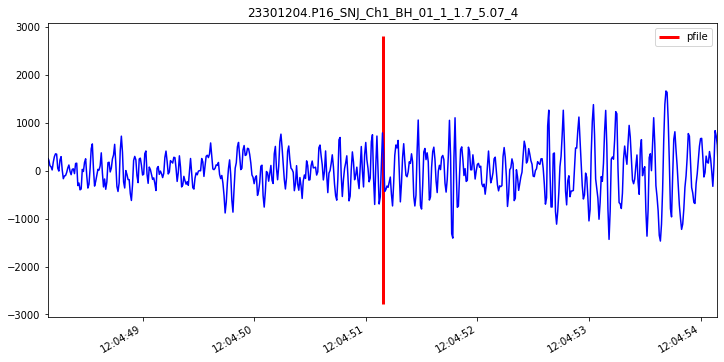

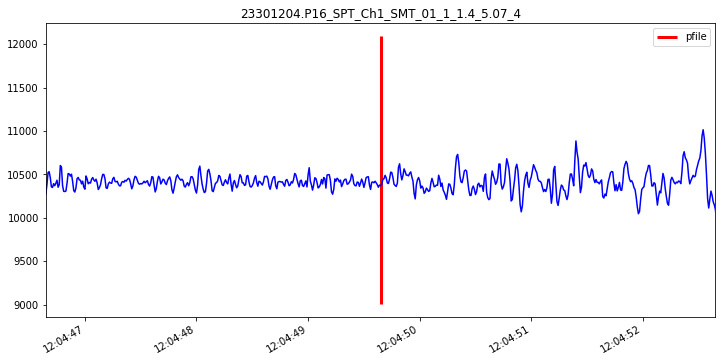

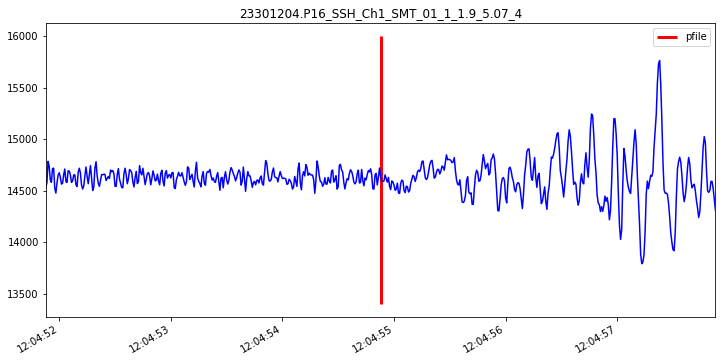

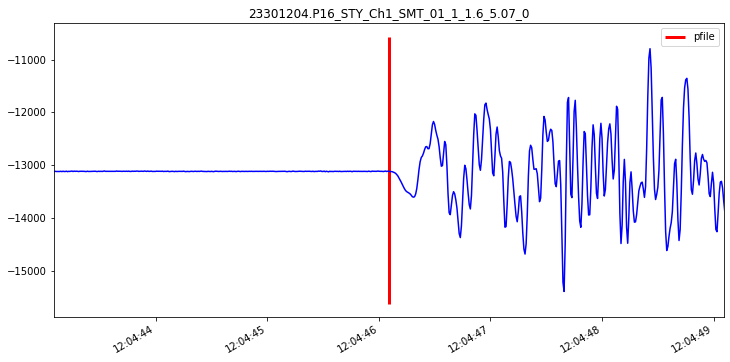

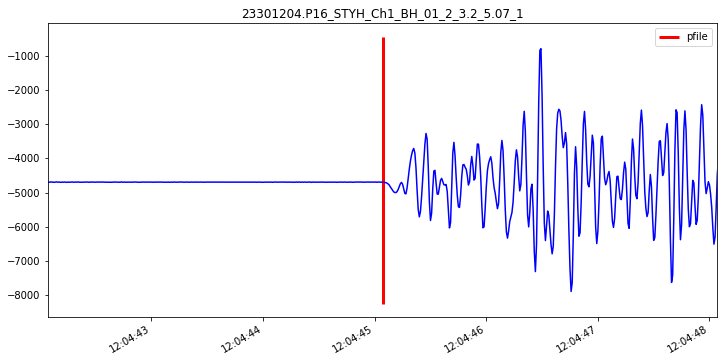

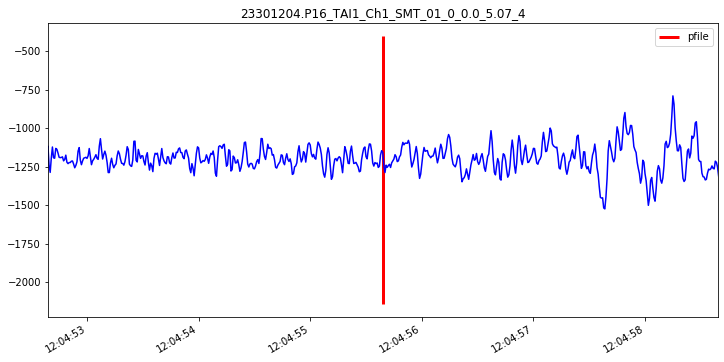

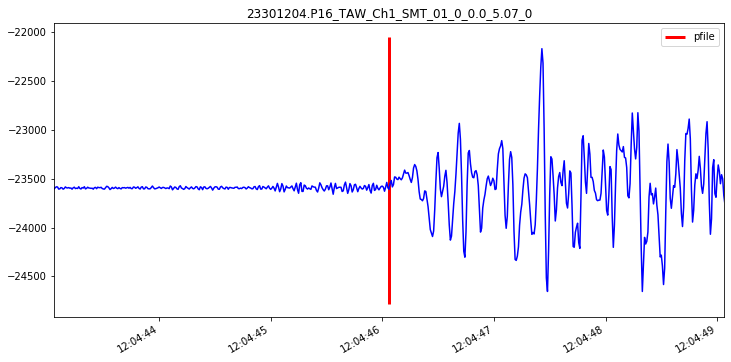

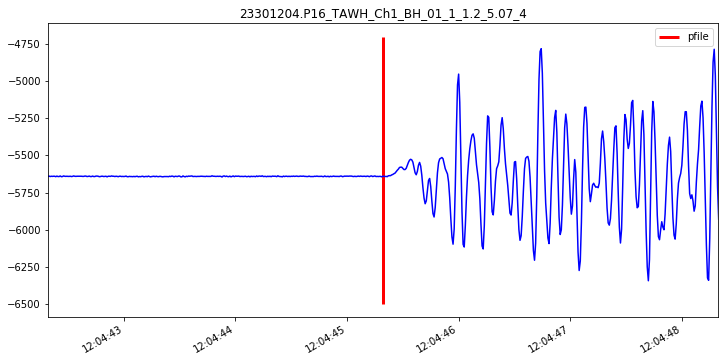

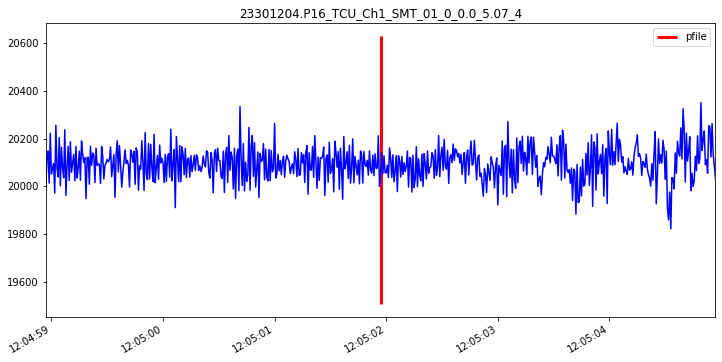

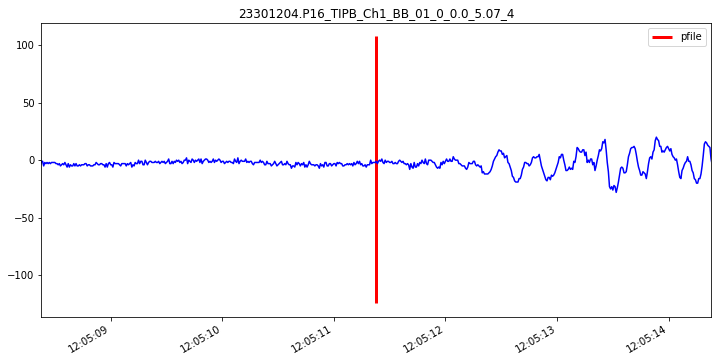

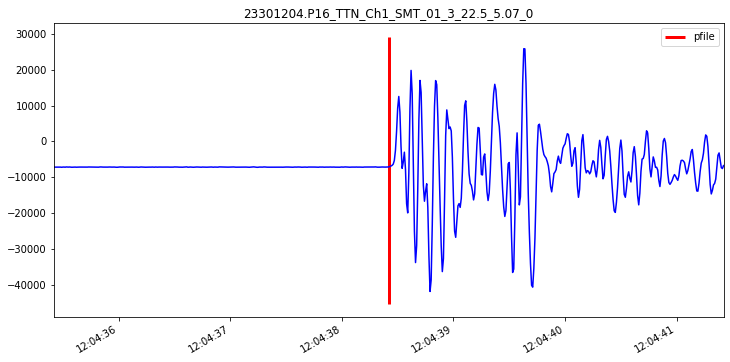

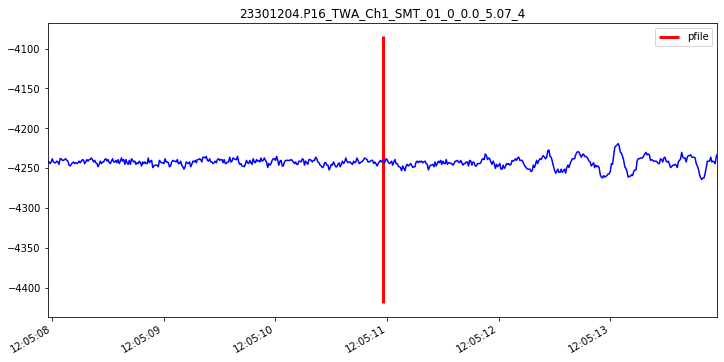

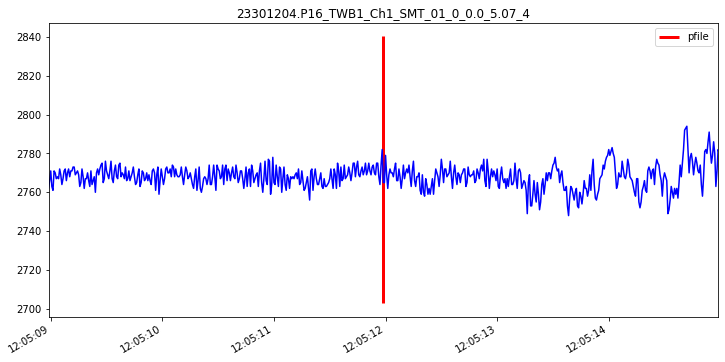

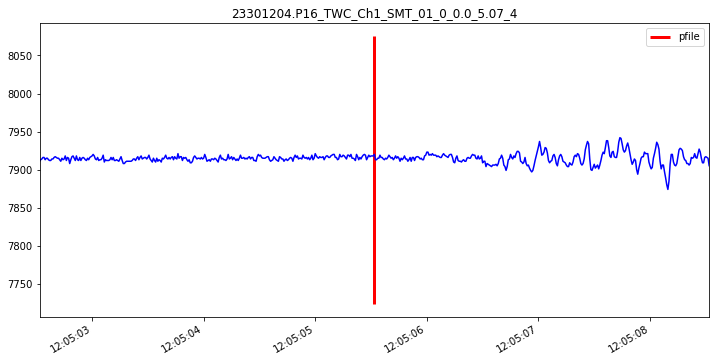

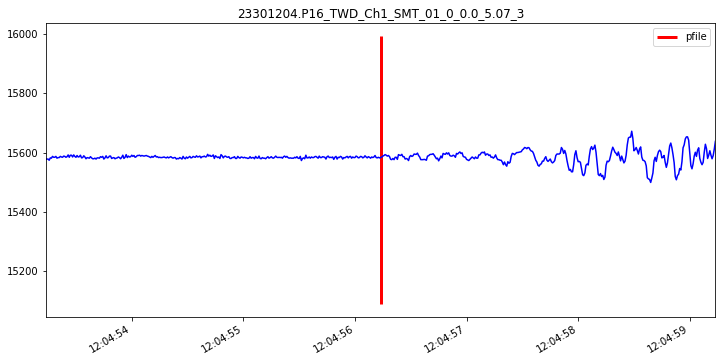

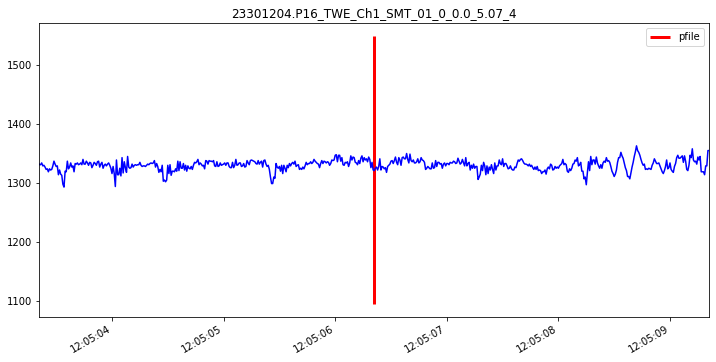

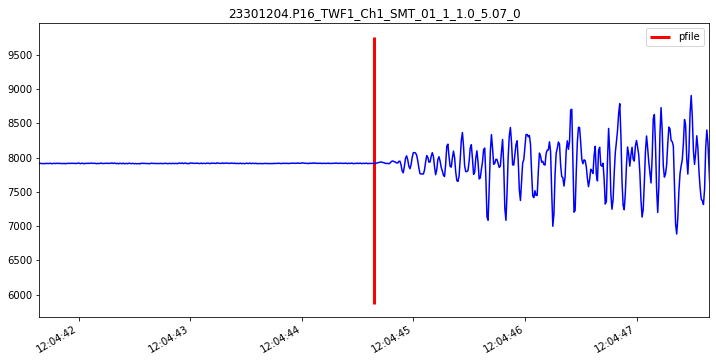

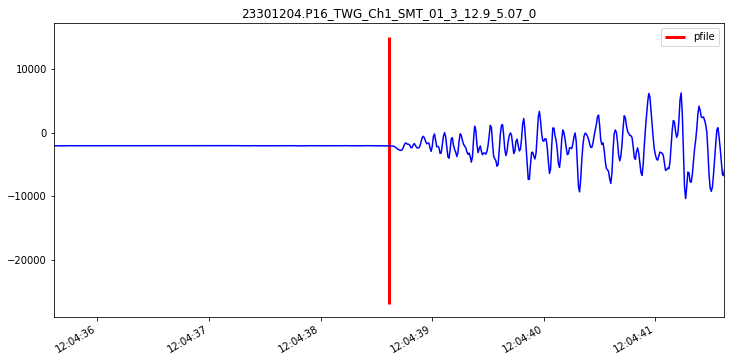

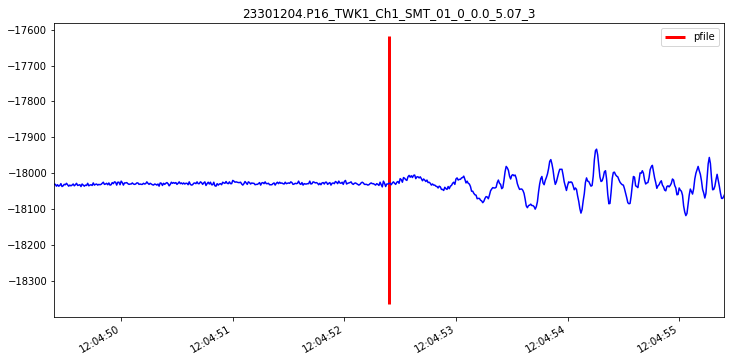

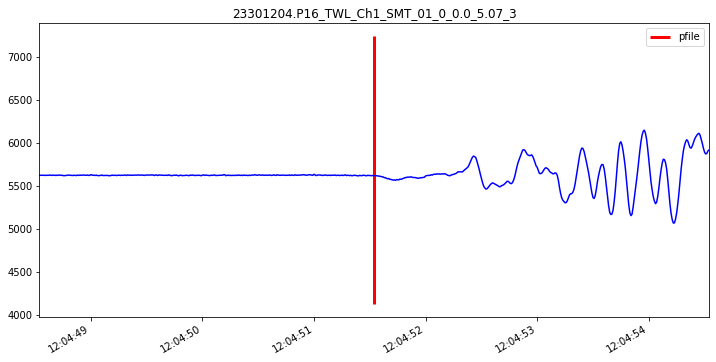

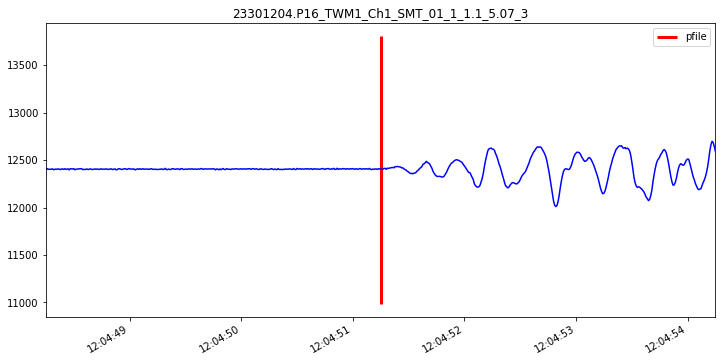

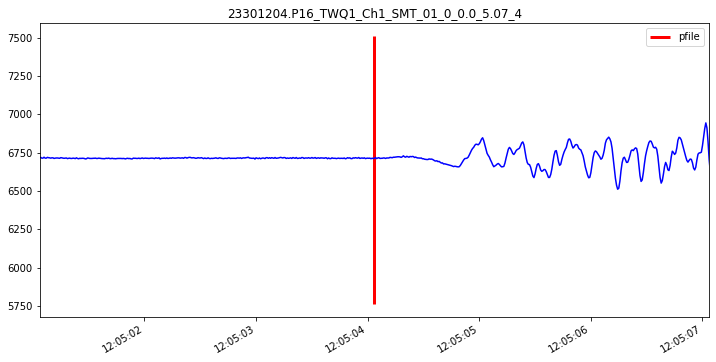

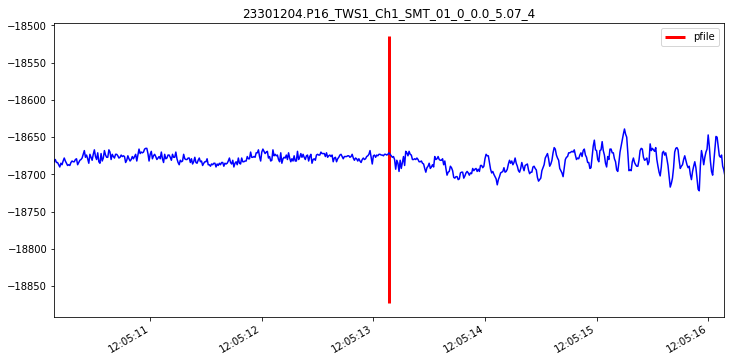

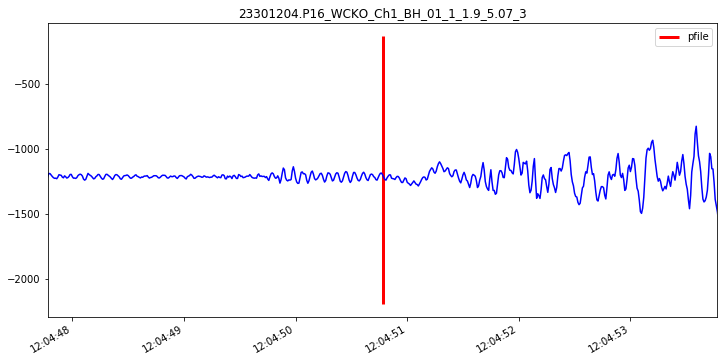

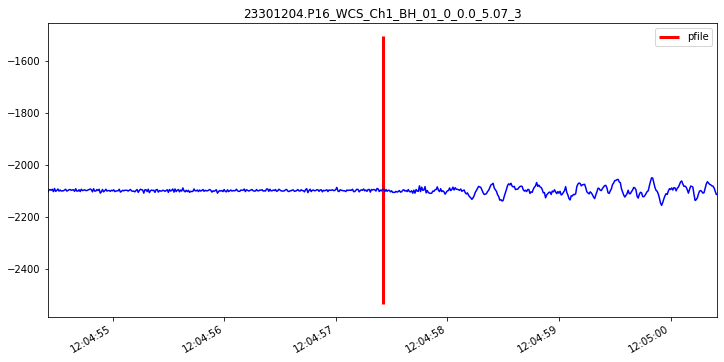

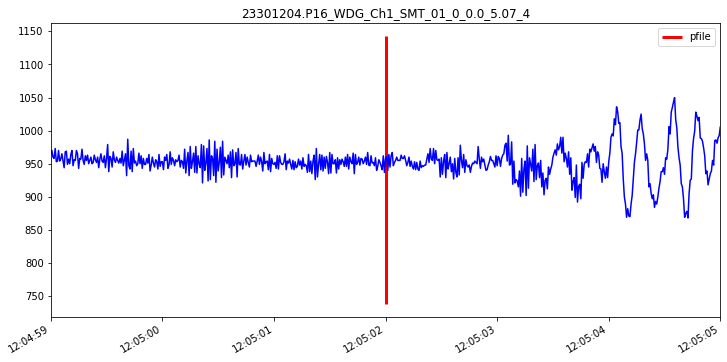

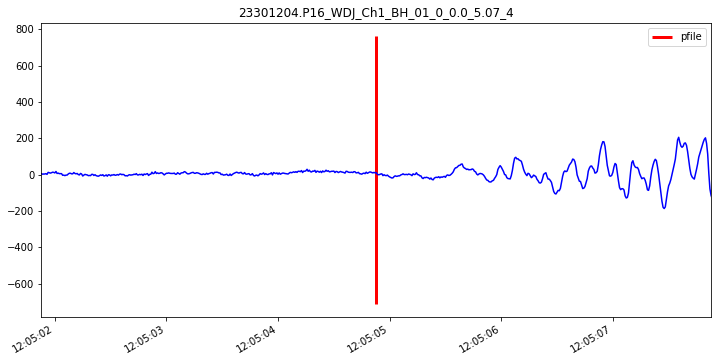

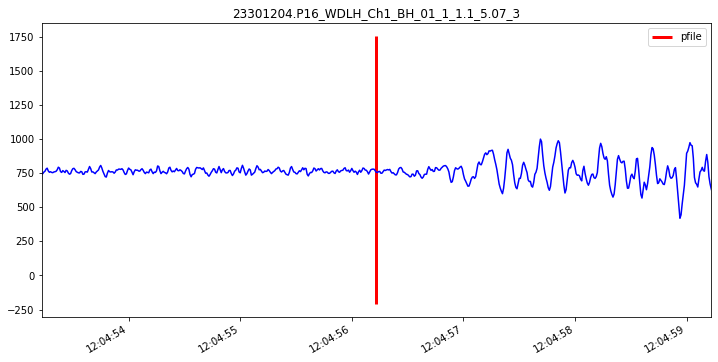

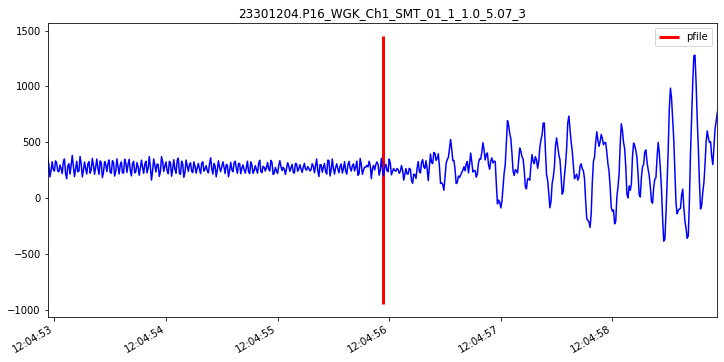

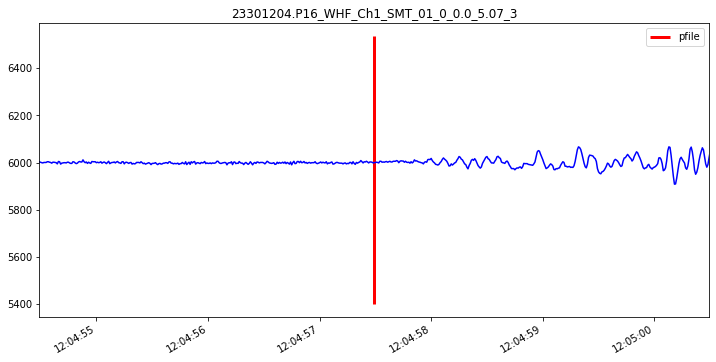

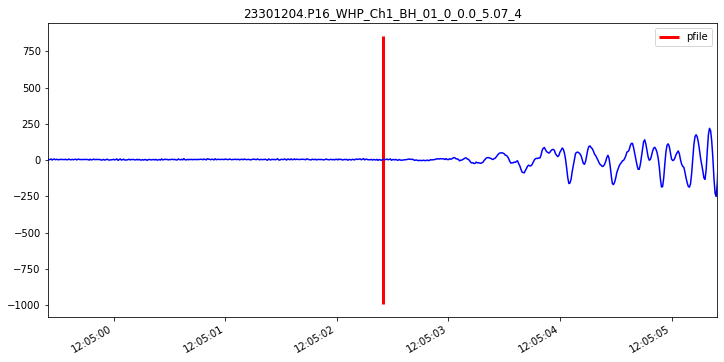

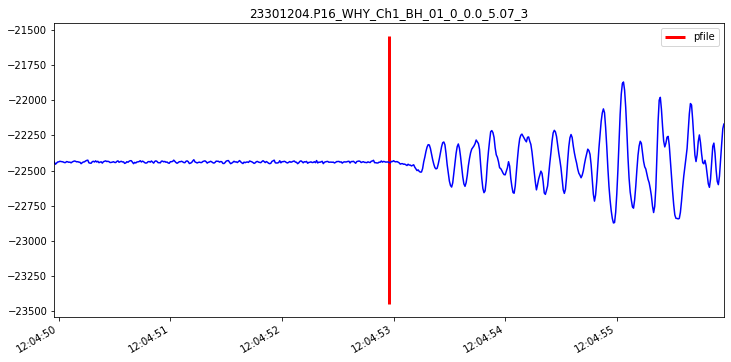

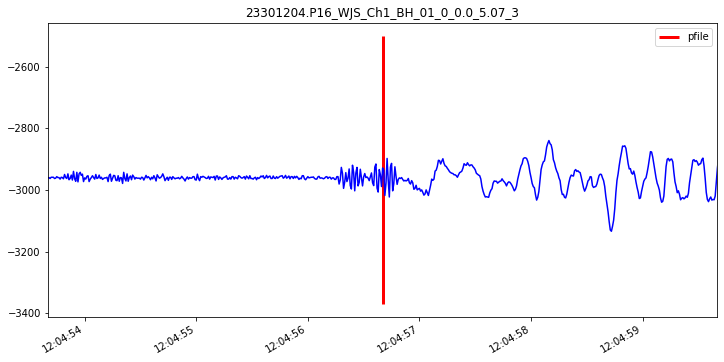

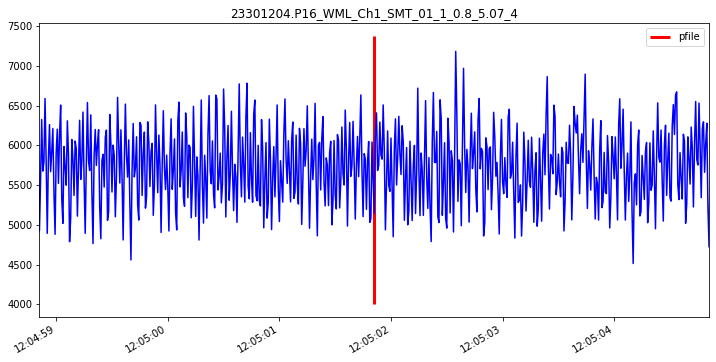

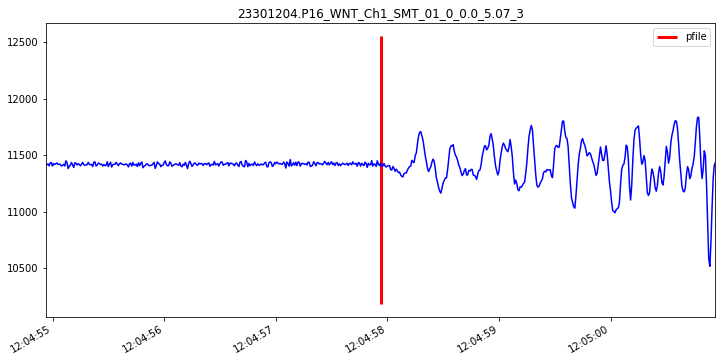

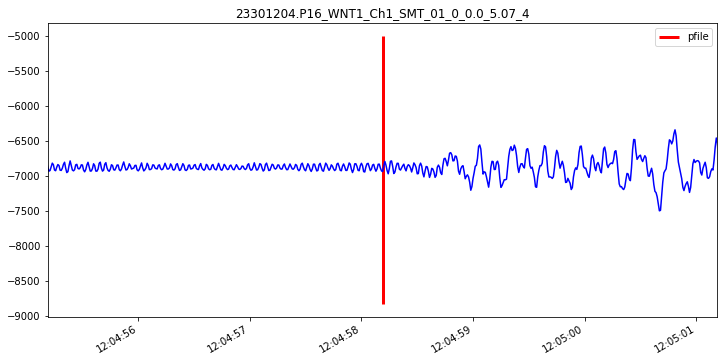

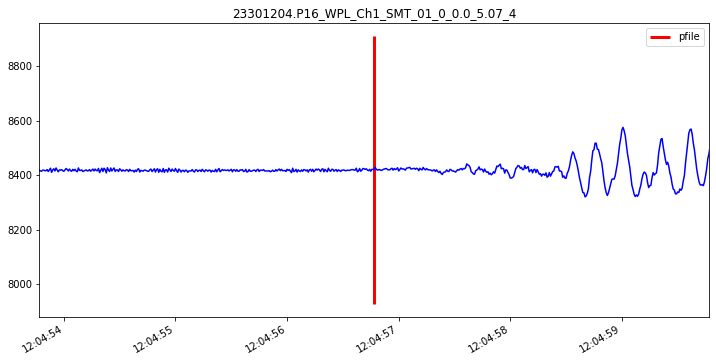

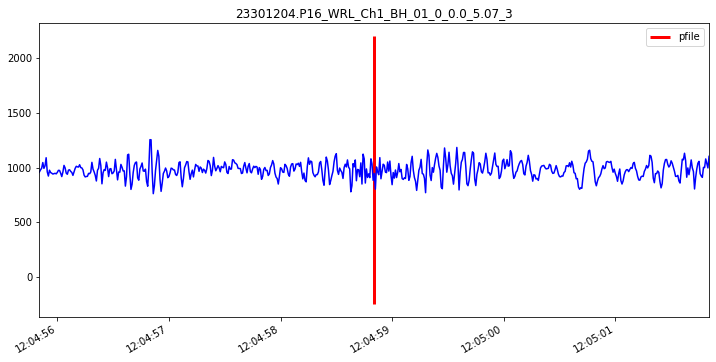

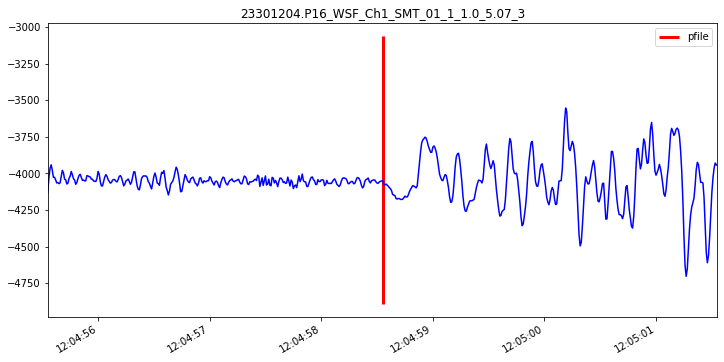

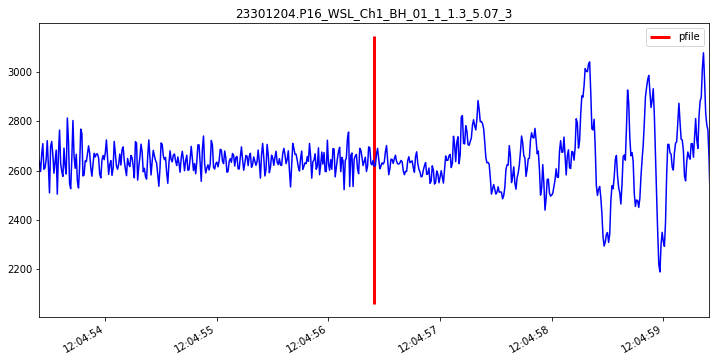

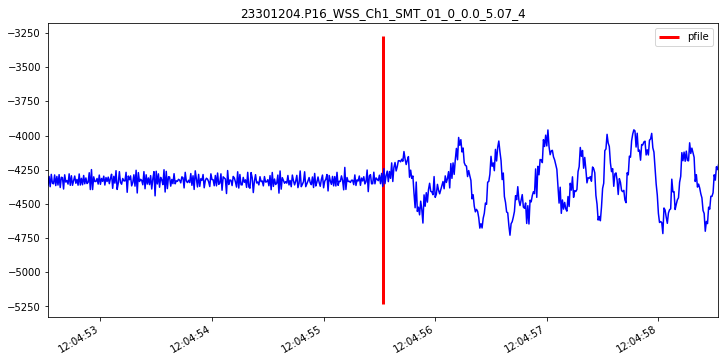

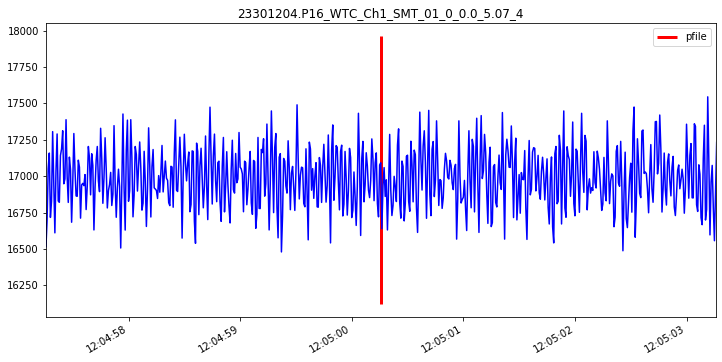

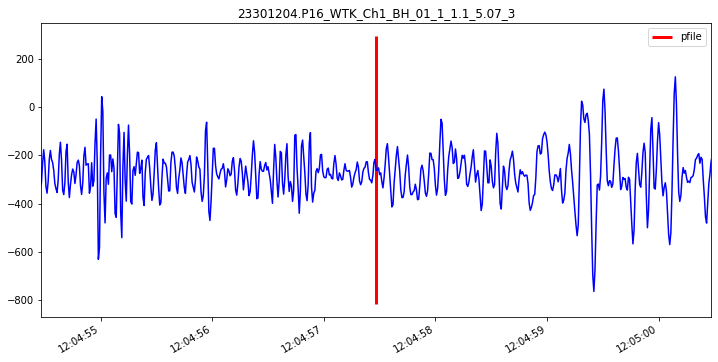

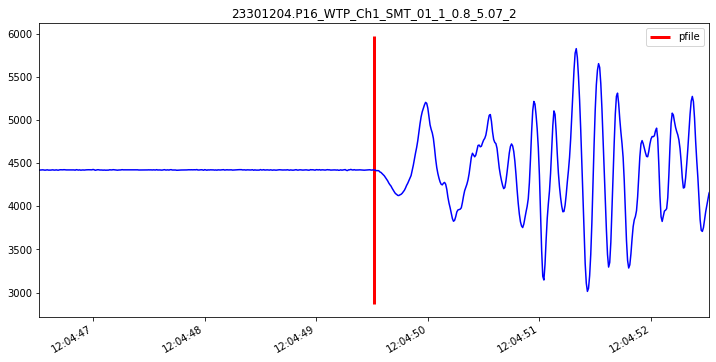

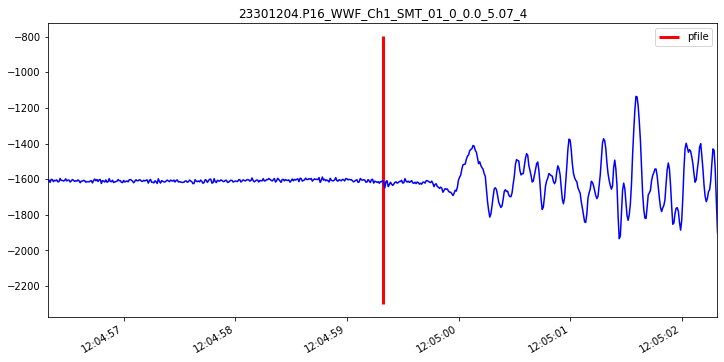

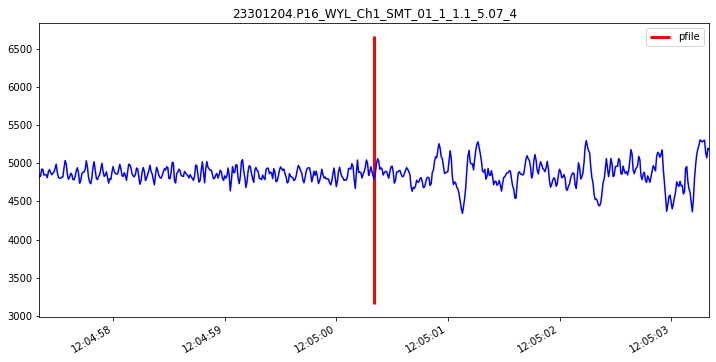

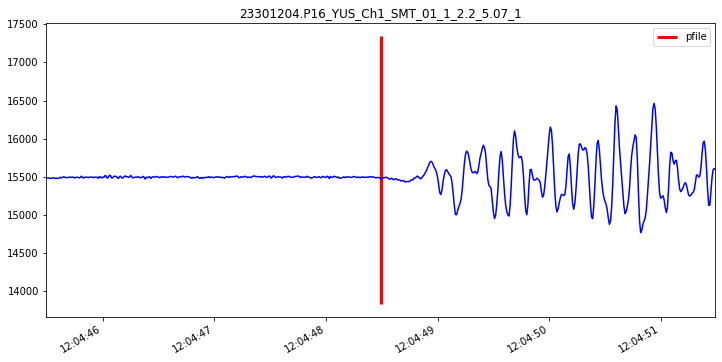

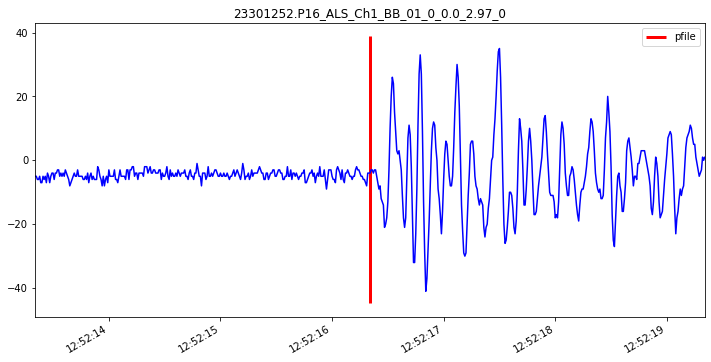

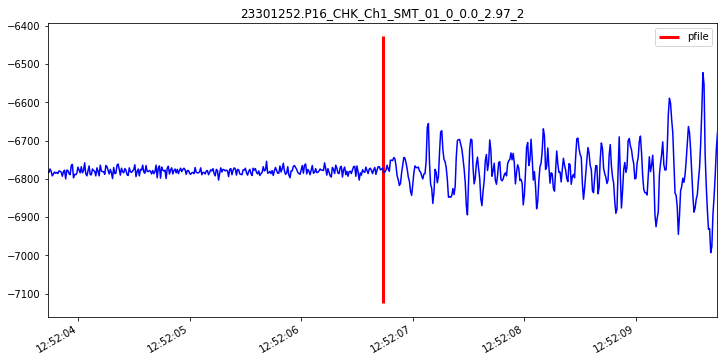

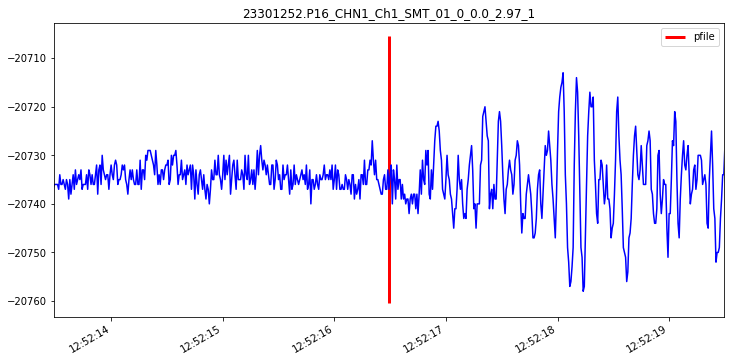

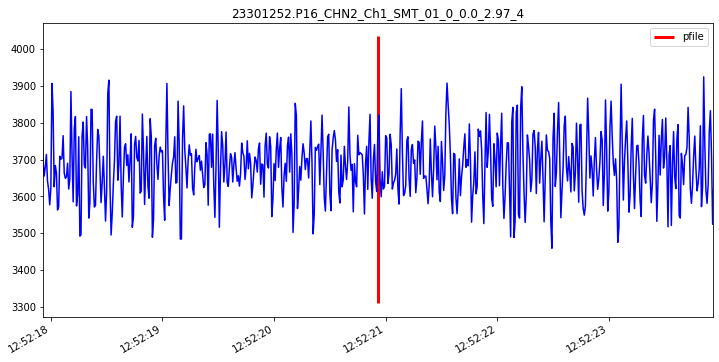

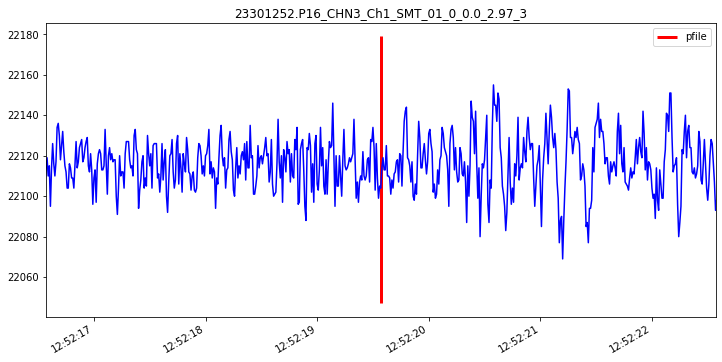

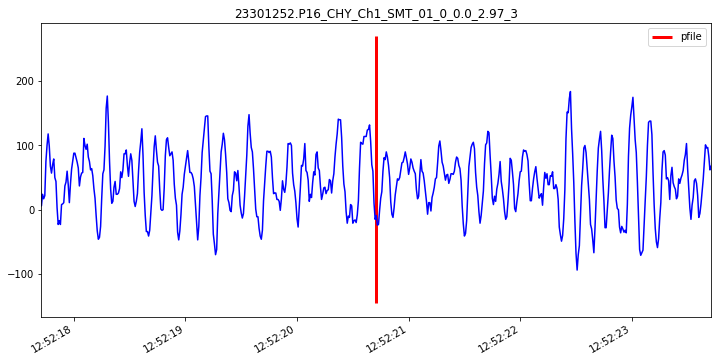

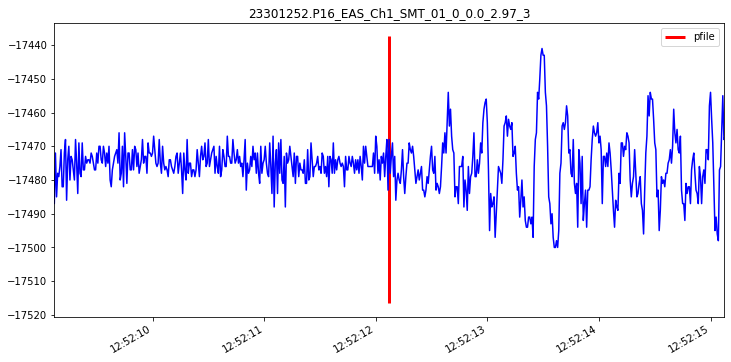

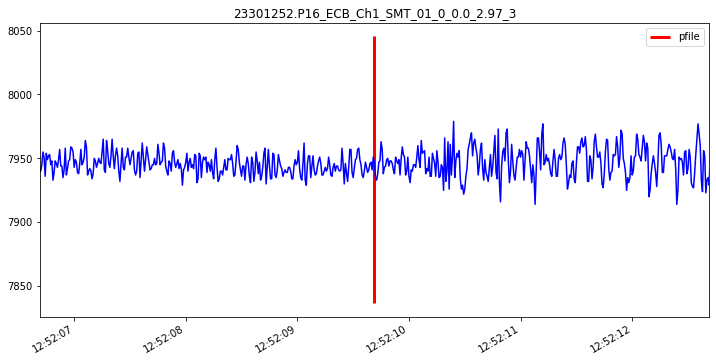

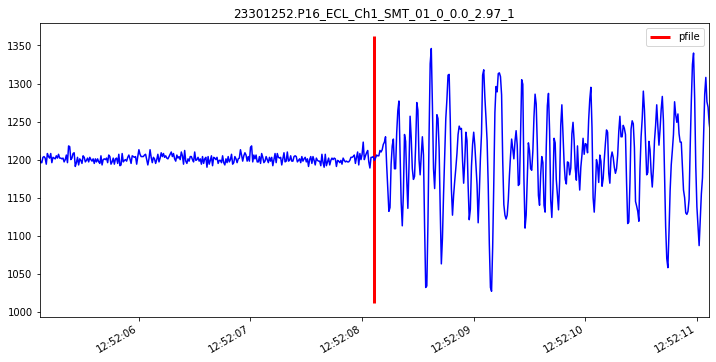

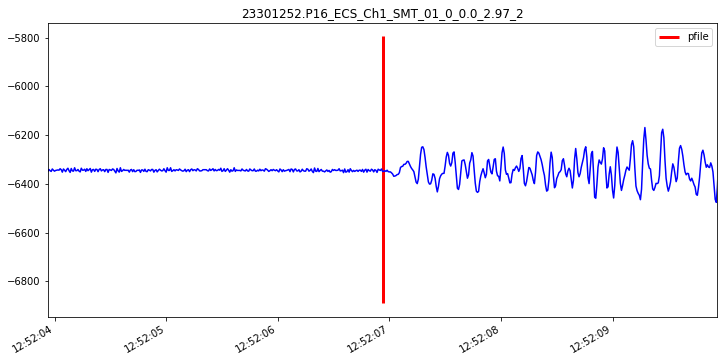

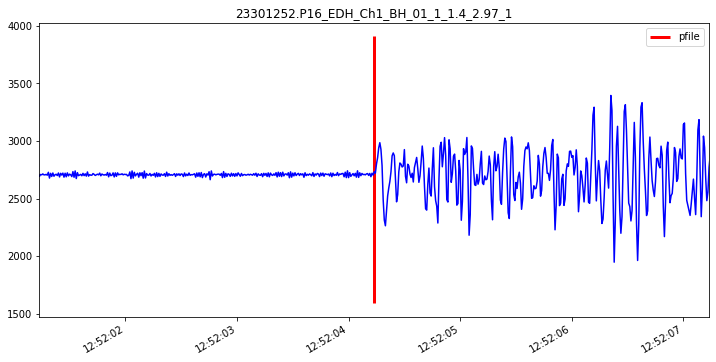

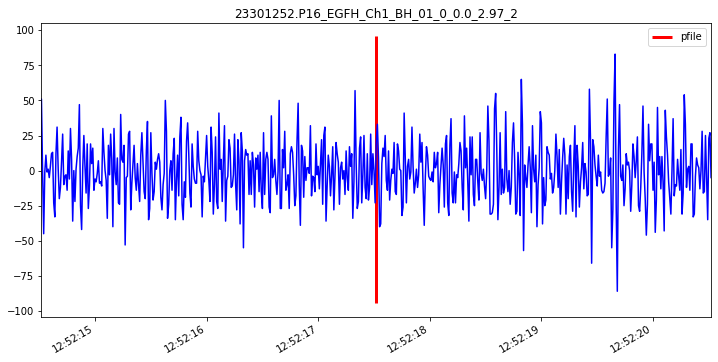

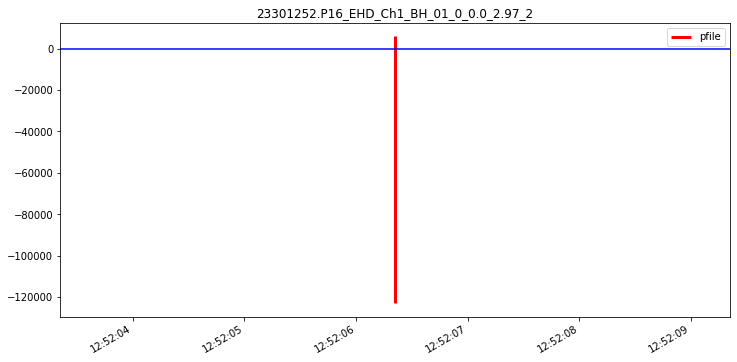

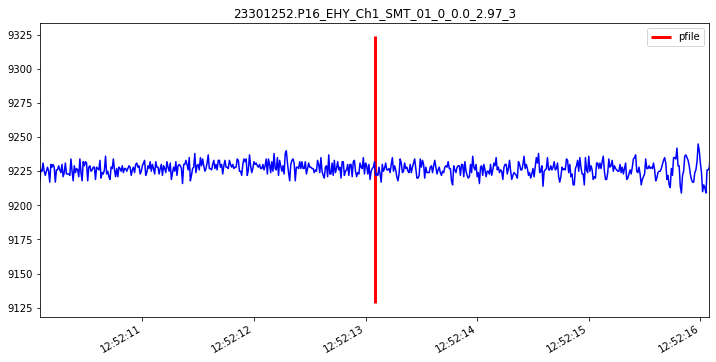

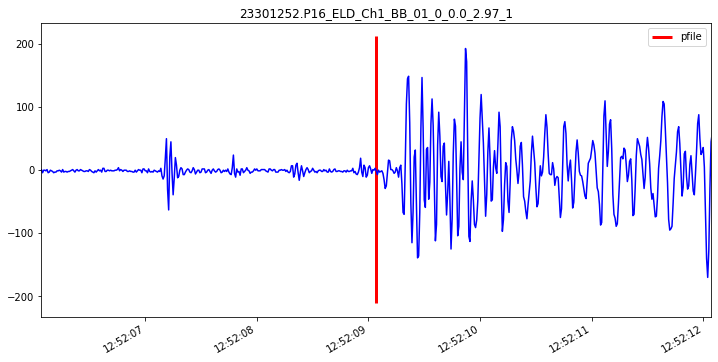

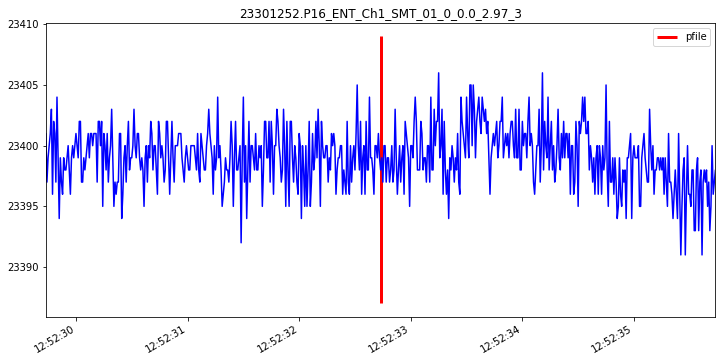

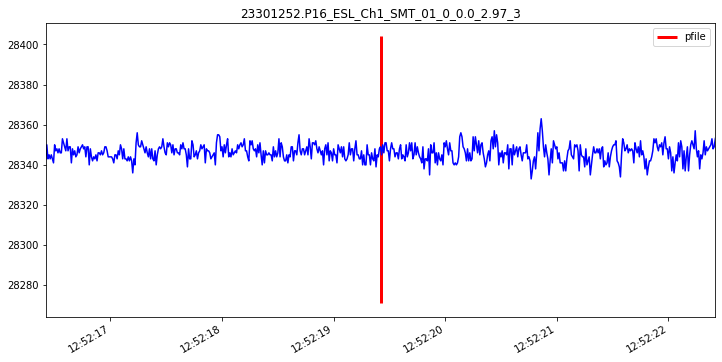

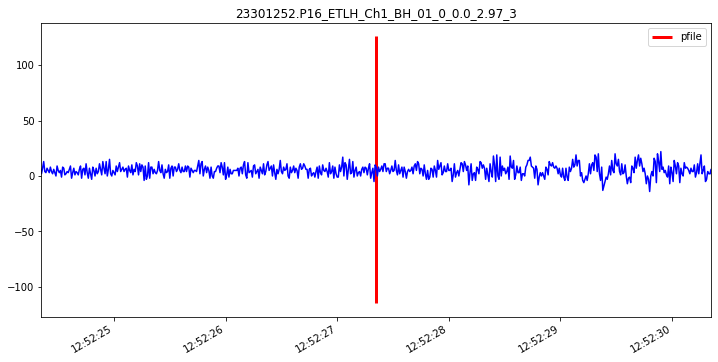

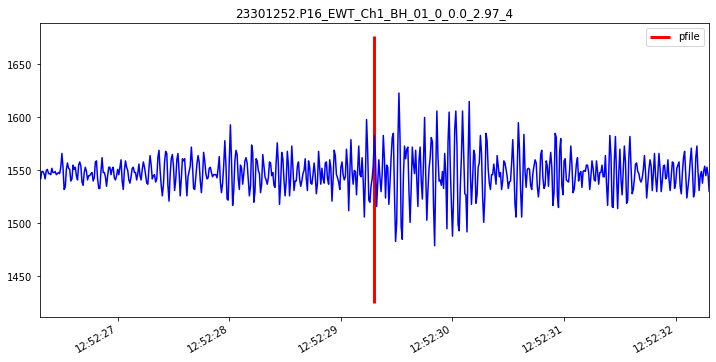

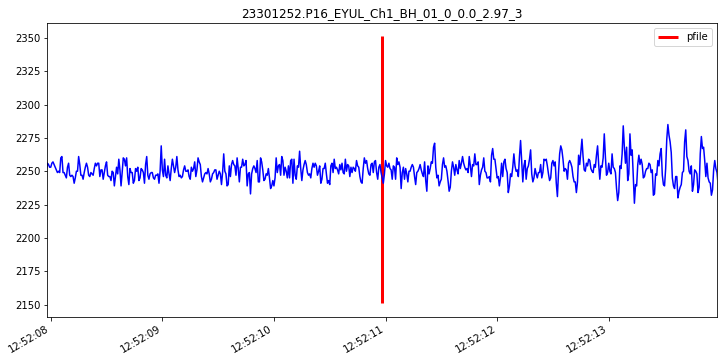

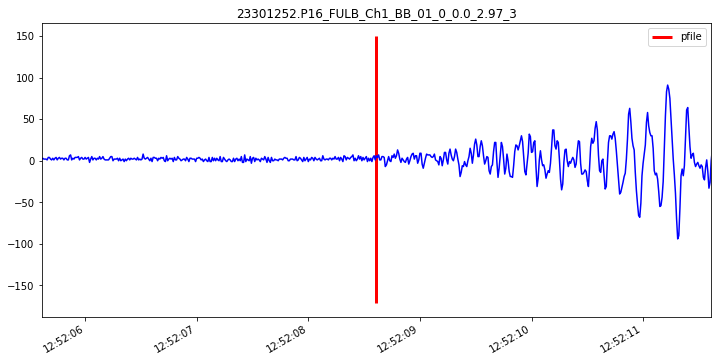

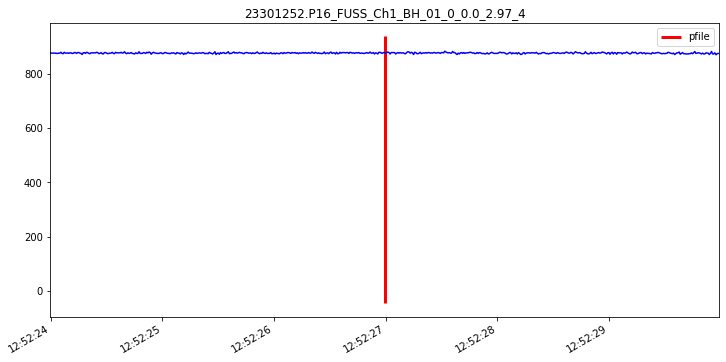

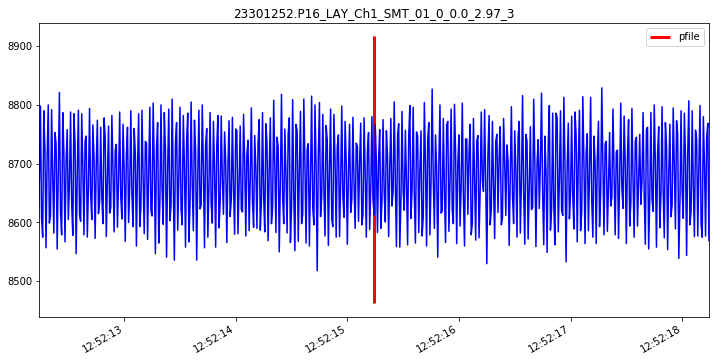

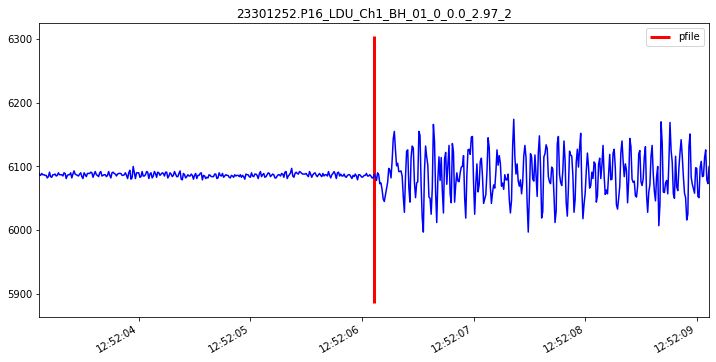

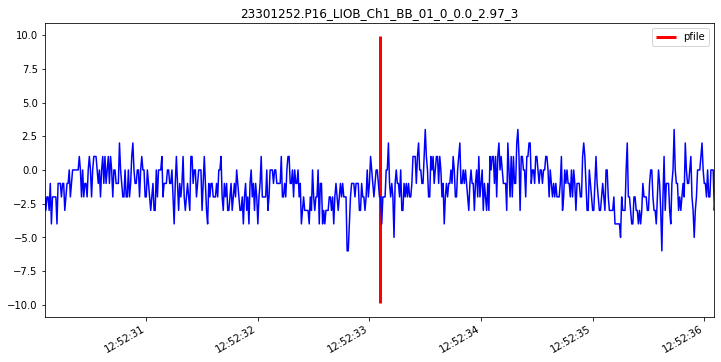

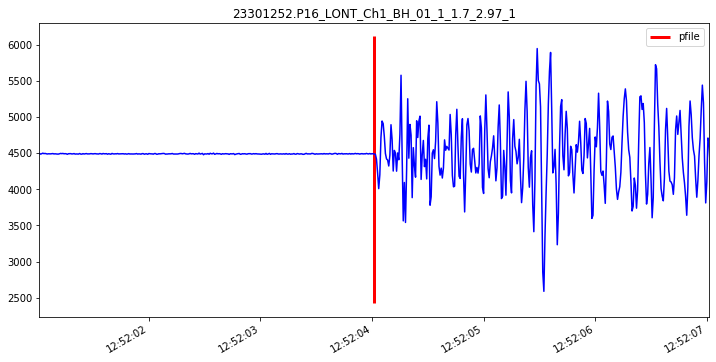

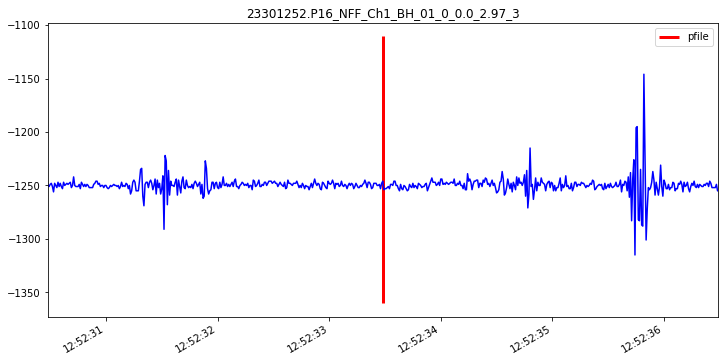

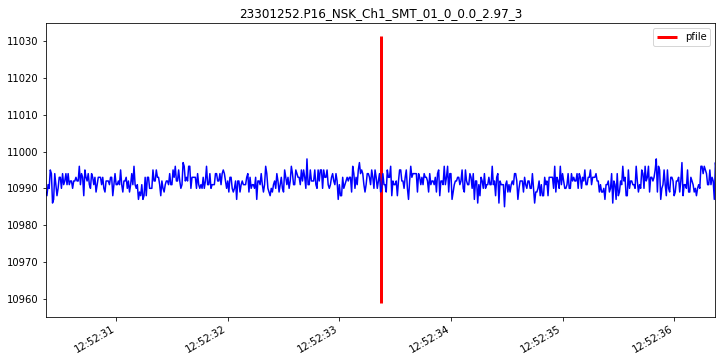

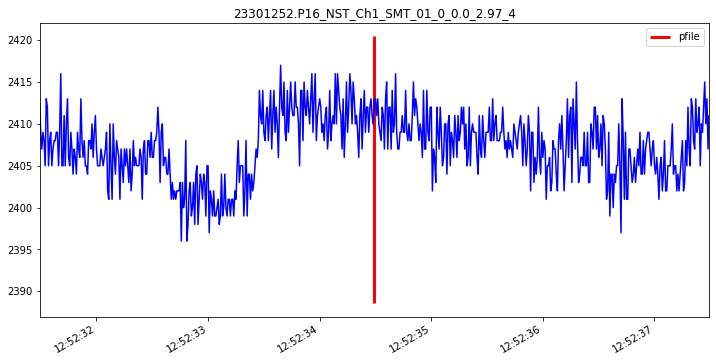

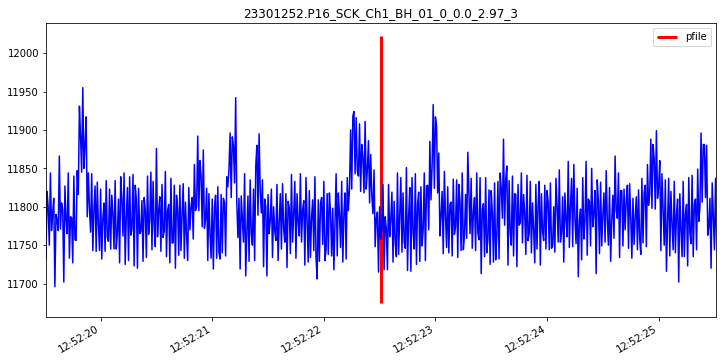

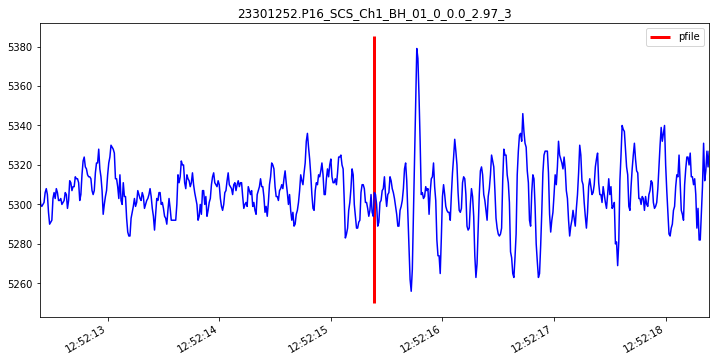

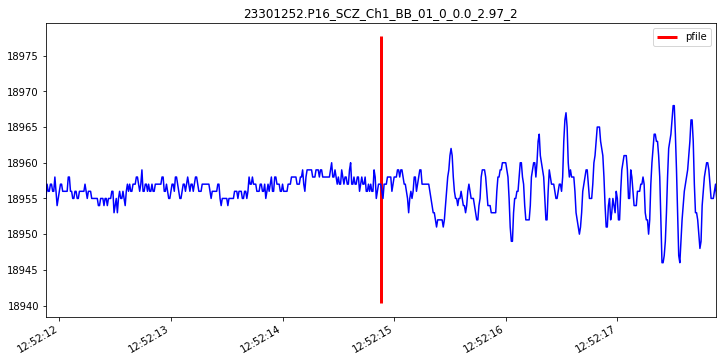

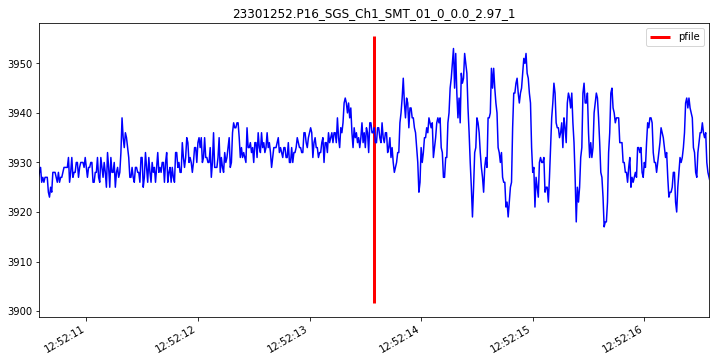

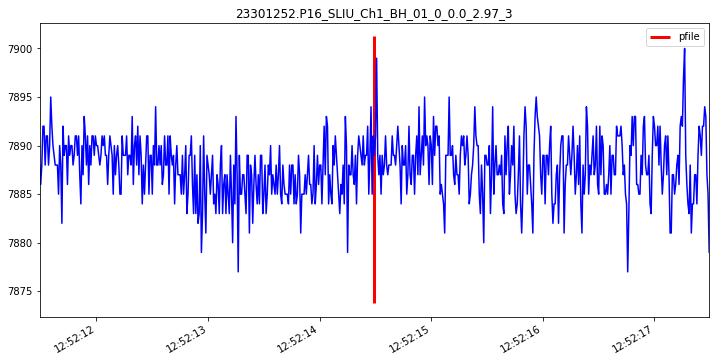

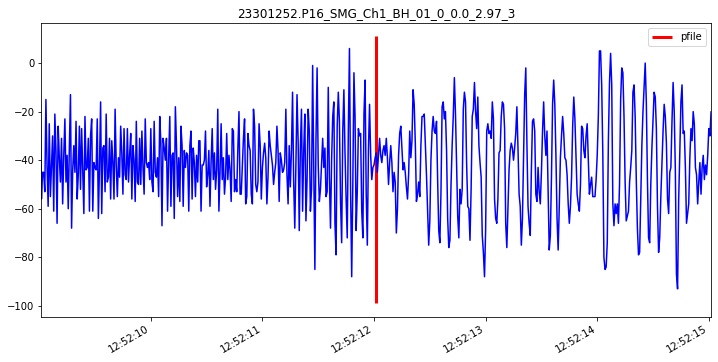

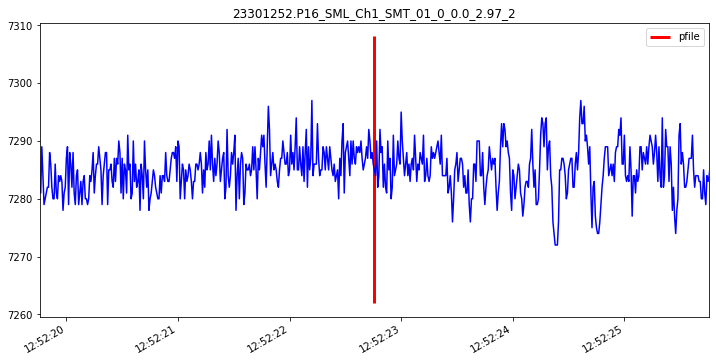

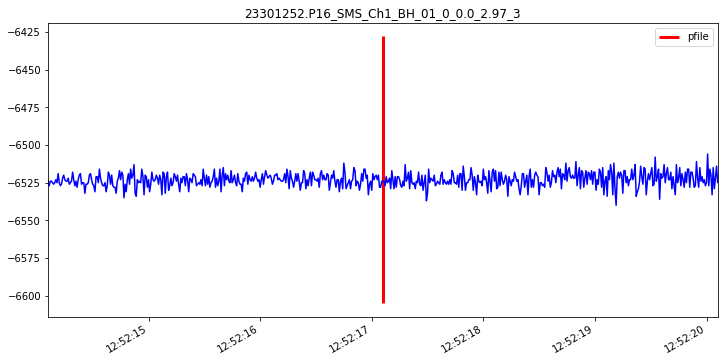

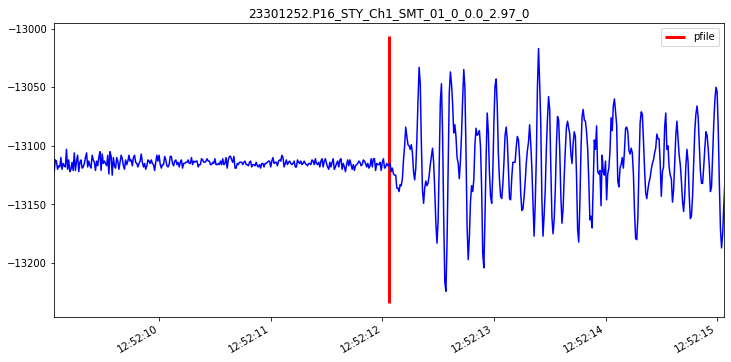

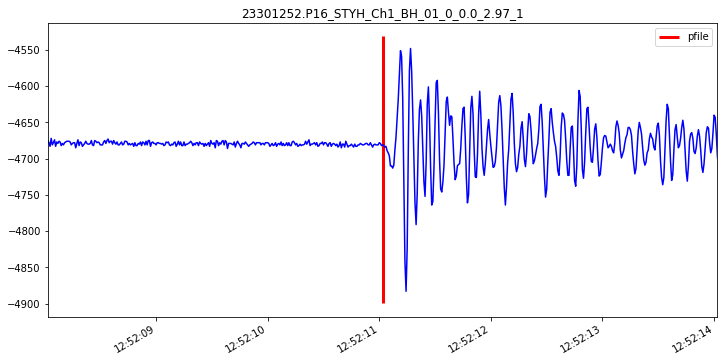

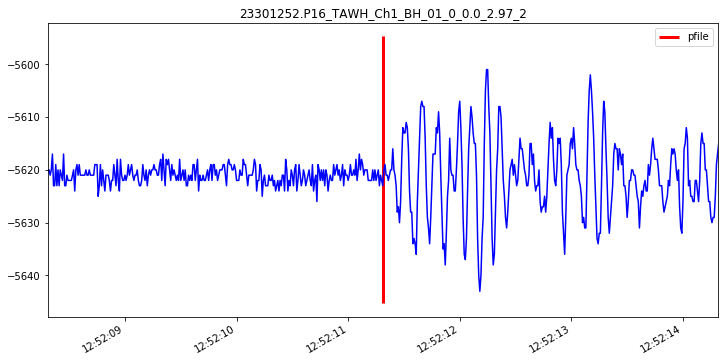

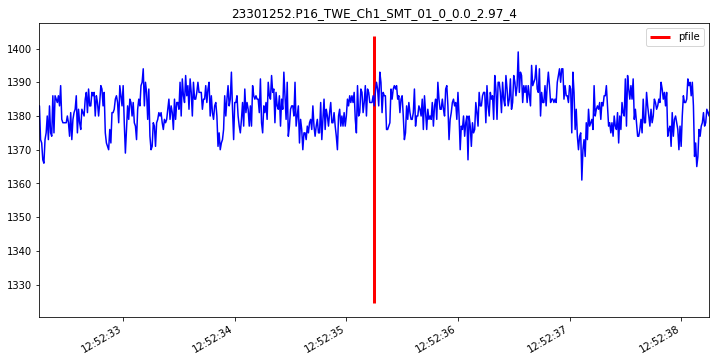

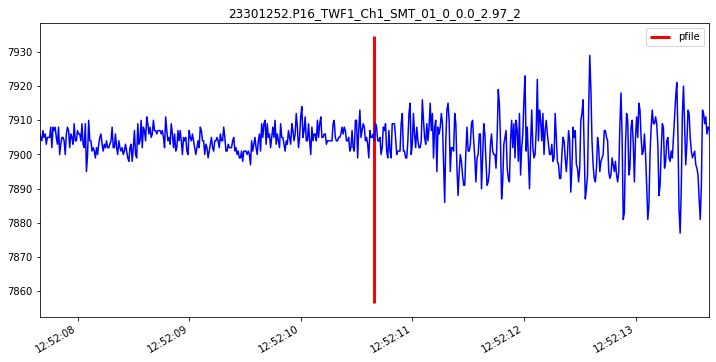

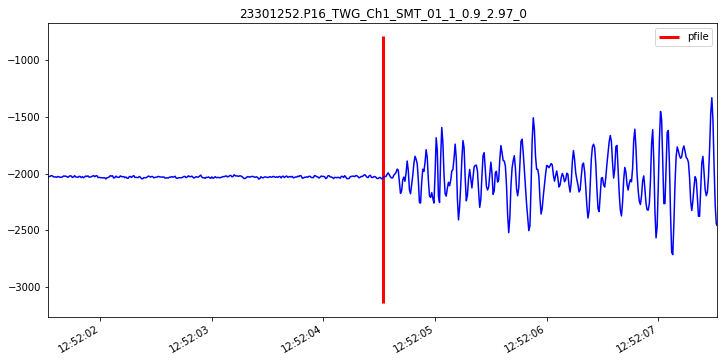

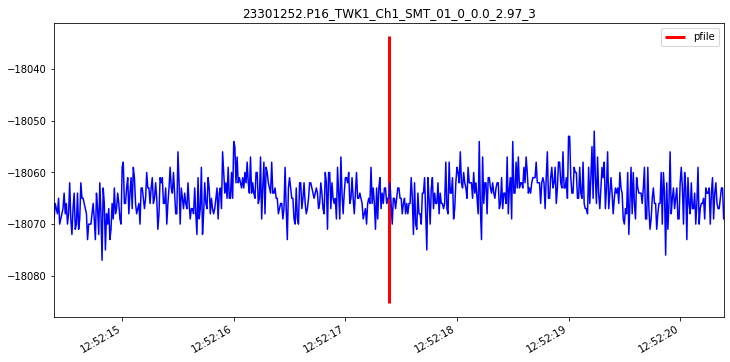

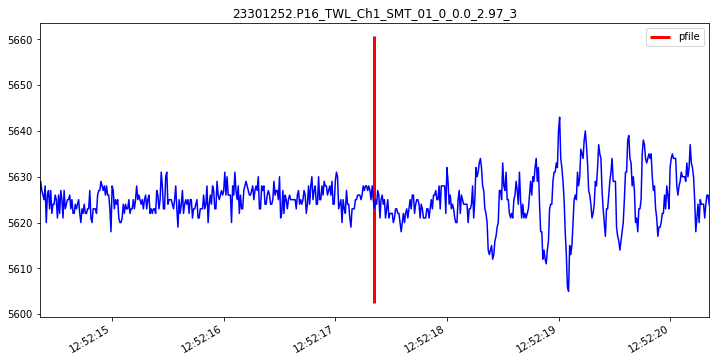

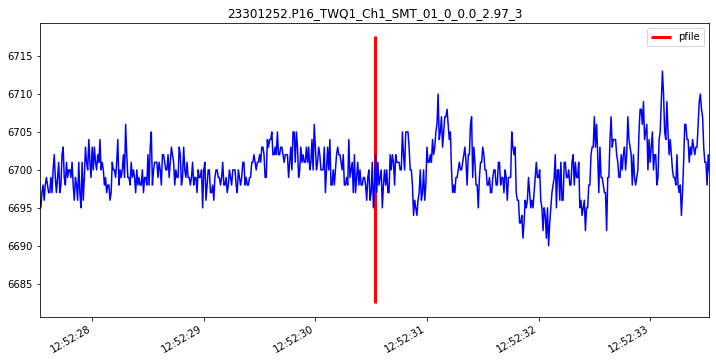

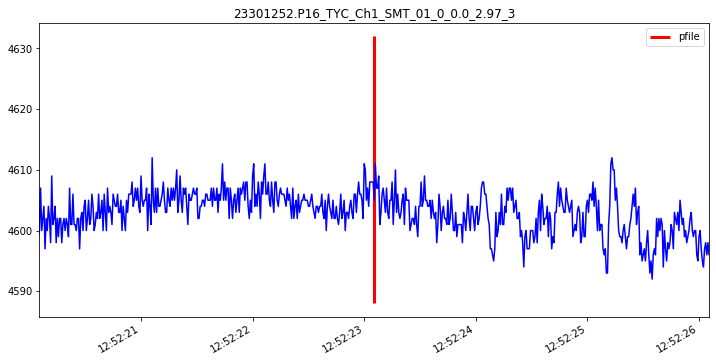

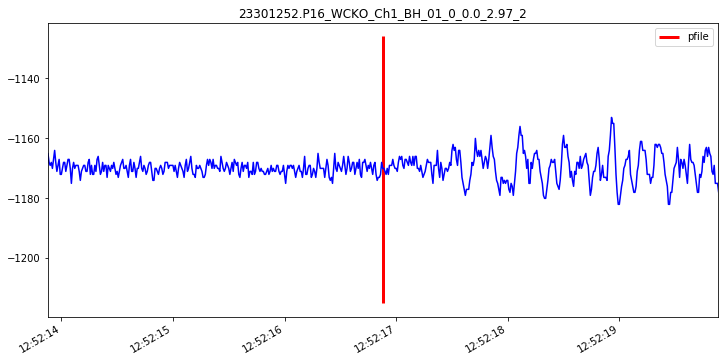

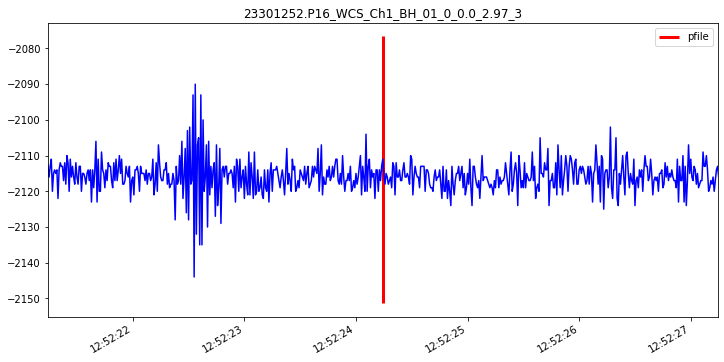

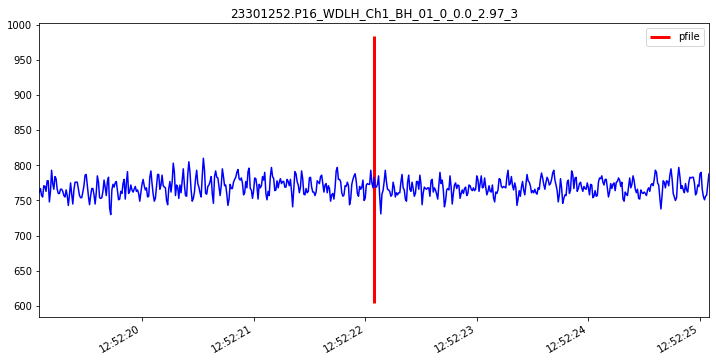

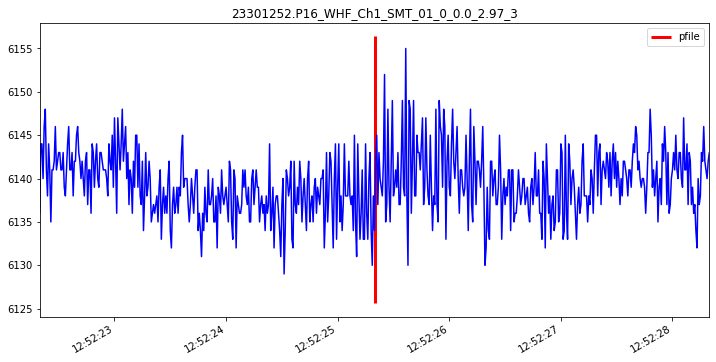

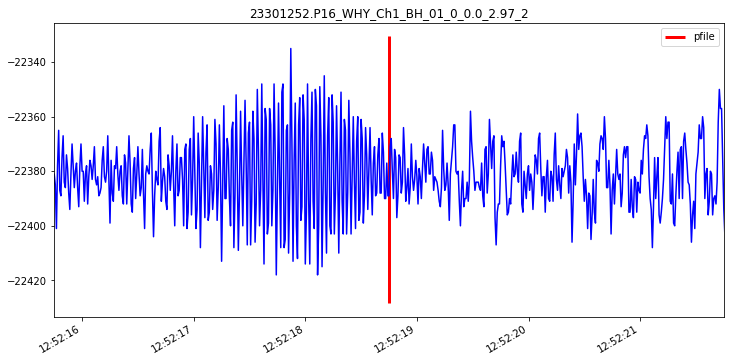

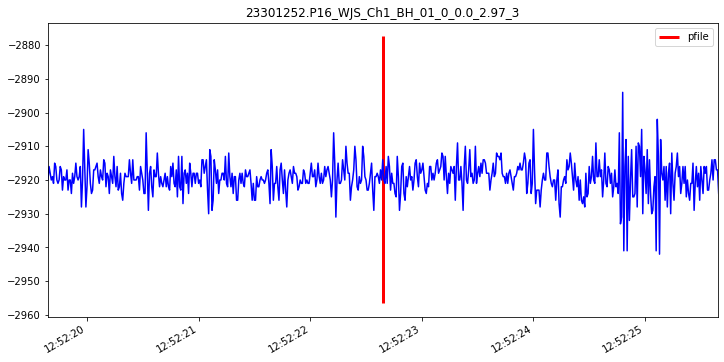

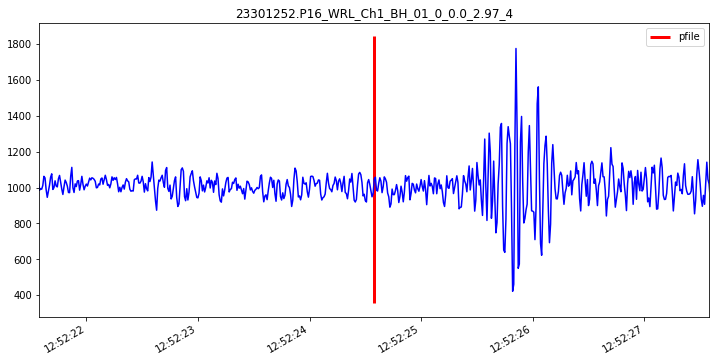

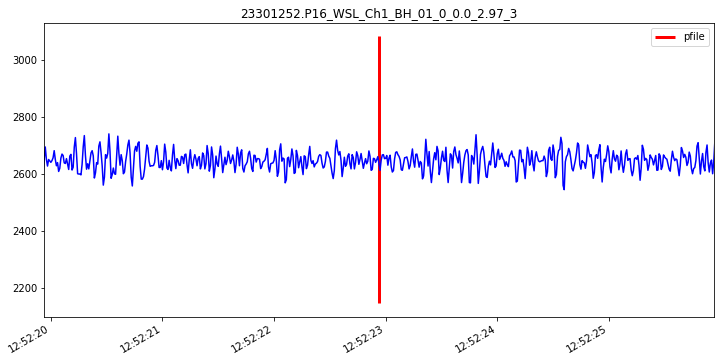

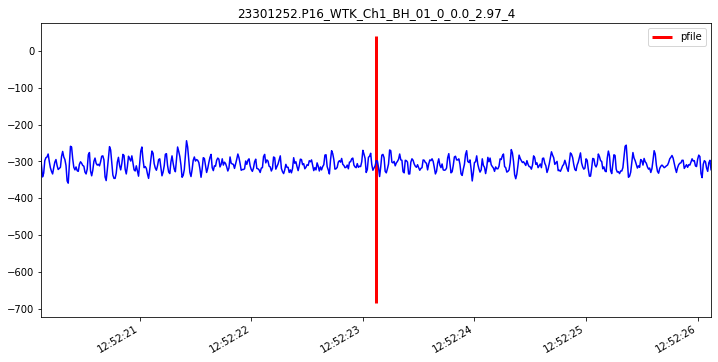

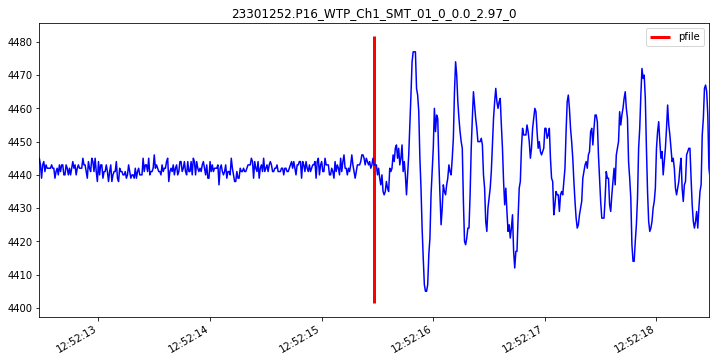

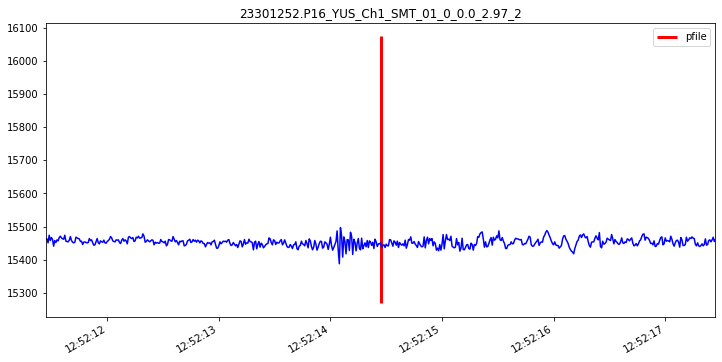

In [4]:
for directory, sub_directory, files in os.walk(r"D:\document\2019\00-Machine Learning for PGA\PandAfile"):
    #print("directory:   "+directory)
    #print(sub_directory)
    for i in files:
        if i.find(".A1")>-1:
            print(i)
            hh = i[:-4]
            ee = i[-2:]
            pfile = hh+".P"+ee
            afile = hh+".A"+ee
            pfile_info = unpackPfile(pfile)
            st = unpackAfile(afile)
            
            stalist = []
            for i in pfile_info['arrival_time']:
                stalist.append(i[:4].strip())
            
            print(stalist)
            
            
            pre_sta=" "
            for tr in st:
                if(tr.stats.station in stalist and tr.stats.station != pre_sta and 
                   tr.stats.channel=="Ch1" and tr.stats.location=="01" ):
                    
                    print("Running "+tr.stats.station)
                    try:
                        tr1 = tr.copy()
                        #print(tr.stats.station)
                        pre_sta=tr.stats.station            
            
                        fig = plt.figure(figsize=(12, 6))
                        ax = fig.add_subplot(1, 1, 1)
                        
                        tr_times = tr.times("matplotlib")
                        ax.plot(tr_times, tr.data, "b-")  #plot wave
                        ymin, ymax = ax.get_ylim()
            
                        pfile_arrival = int((pfile_info["arrival_time"][tr.stats.station] - tr.stats.starttime.datetime) / timedelta(microseconds=10000))
                        ax.vlines(tr_times[pfile_arrival], ymin, ymax, color='r', linewidth=3, label="pfile")
            
                        time_diff = 300  
                        #time_diff = 10
                        plt.xlim(tr_times[pfile_arrival-time_diff],tr_times[pfile_arrival+time_diff])  #放大
            
            
                        title = "_".join([pfile,tr.stats.station,tr.stats.channel,tr.stats.network,tr.stats.location
                              ,str(pfile_info["intensity"][tr.stats.station])
                              ,str(pfile_info["pga"][tr.stats.station])
                              ,str(pfile_info["mag"])
                              ,str(pfile_info["weighting"][tr.stats.station]) 
                             ])
           
                        plt.title(title)
                        ax.xaxis_date()
                        fig.autofmt_xdate()
                        plt.legend()
                        plt.savefig(title + ".png")
            
                        st = pfile_arrival-time_diff
                        ed = pfile_arrival+time_diff
                        dd=tr1.data[st:ed+1]

                        str1 = "D:\\document\\2019\\00-Machine Learning for PGA\\PandAfile\\"+title+".txt"
                        f = open(str1,"w")
                        for i in dd:
                            f.write(str(i)+"\n")
                        f.close()            
                    except:
                        pass